# =============ZomatoRestaurantProject========================

# Problem Statement:

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
 Country code
 Country name
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables

- •  Restaurant Id: Unique id of every restaurant across various cities of the world
- •  Restaurant Name: Name of the restaurant
- • Country Code: Country in which restaurant is located
- • City: City in which restaurant is located
- • Address: Address of the restaurant
- • Locality: Location in the city
- • Locality Verbose: Detailed description of the locality
- • Longitude: Longitude coordinate of the restaurant&#39;s location
- • Latitude: Latitude coordinate of the restaurant&#39;s location
- • Cuisines: Cuisines offered by the restaurant
- • Average Cost for two: Cost for two people in different currencies ��
- • Currency: Currency of the country
- • Has Table booking: yes/no
- • Has Online delivery: yes/ no
- • Is delivering: yes/ no
- • Switch to order menu: yes/no
- • Price range: range of price of food
- • Aggregate Rating: Average rating out of 5
- • Rating color: depending upon the average rating color
- • Rating text: text on the basis of rating of rating
 -• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
- 1) Average Cost for two
- 2) Price range

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as ms
import warnings
warnings.filterwarnings('ignore')


# importing the dataset

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding = 'latin-1')
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
#Reading country excel file
df2 = pd.read_excel(r"D:\Desktop\intership 31\Country-Code.xlsx")
df2.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [4]:
#merging the two dataset
df = pd.merge(df1,df2,on='Country Code',how = 'left')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# Analysing Raw Data set

In [5]:
df.shape

(9551, 22)

# observation
- dataset contain 9551 rows and 22 columns

In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

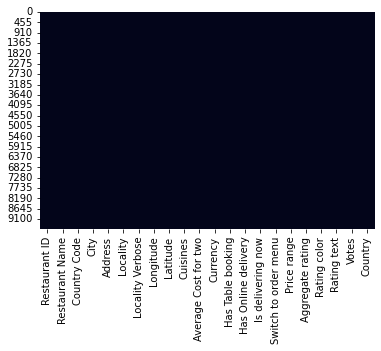

In [9]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

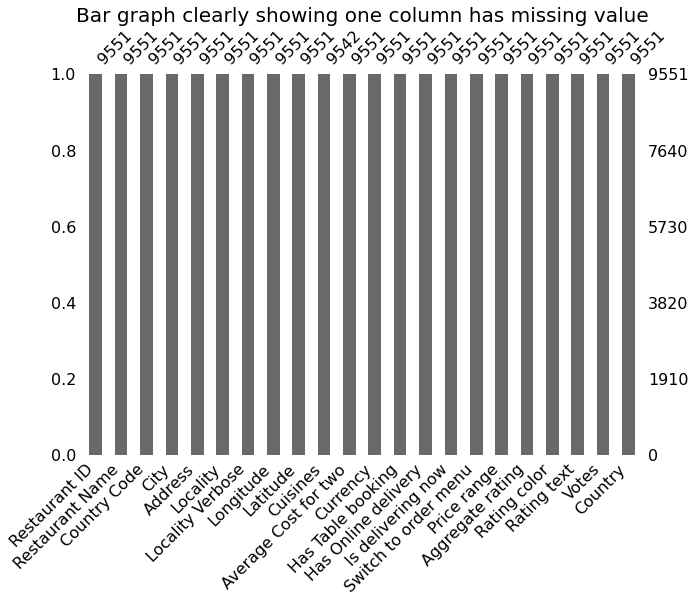

In [10]:
ms.bar(df,figsize=(10,7))
plt.title("Bar graph clearly showing one column has missing value",size=20);

# Imputing the missing value

In [11]:
df['Cuisines'].mode()

0    North Indian
Name: Cuisines, dtype: object

In [12]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

In [13]:
#dropping unnecessary columns
df = df.drop(columns=('Restaurant ID'),axis=1)

In [14]:
df.nunique()

Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [15]:
df.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# observation:
    1. no column has missing or null values are there in any columns
    2. standard daviation is far greater than mean in country code which is matter of concern.
    3. max value of country code is also too large .
    4. Average cost of two has std greater than mean and also max value has a huge jump from 75% as compared to jump over
    the value fron 25% to 50% and 50% to 75%.
    5. similarly votes columns has also mean less than std and huge jump in the value from 75% to max.

In [16]:
df['Switch to order menu'].value_counts() 

No    9551
Name: Switch to order menu, dtype: int64

In [17]:
df['Switch to order menu']

0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Switch to order menu, Length: 9551, dtype: object

In [18]:
df = df.drop(columns=('Switch to order menu'),axis=1)

In [19]:
df.head(1)

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines


In [20]:
df.shape

(9551, 20)

In [21]:
#Droping Duplicates
df.drop_duplicates()
df.shape

(9551, 20)

dataset contains no duplicates value.

# modifying the name as its contains separated value

In [22]:
df.rename(columns={'Restaurant Name': 'Restaurant_Name', 'Country Code': 'Country_Code', 'Locality Verbose': 'Locality_Verbose', 
        'Average Cost for two':'Average_Cost_for_two','Has Table booking':'Has_Table_booking',
        'Has Online delivery':'Has_Online_delivery', 'Is delivering now':'Is_delivering_now','Rating text':'Rating_text',
        'Price range':'Price_range', 'Aggregate rating':'Aggregate_rating','Rating color':'Rating_color'}, inplace=True)

# checking  any space, 'NA', '?' or '-' exist in dataset

In [23]:
df.isin(['-',' ','?']).sum().any()

False

In [24]:
df.describe(include='object').T

,count,unique,top,freq
Restaurant_Name,9551,7446,Cafe Coffee Day,83
City,9551,141,New Delhi,5473
Address,9551,8918,"Dilli Haat, INA, New Delhi",11
Locality,9551,1208,Connaught Place,122
Locality_Verbose,9551,1265,"Connaught Place, New Delhi",122
Cuisines,9551,1825,North Indian,945
Currency,9551,12,Indian Rupees(Rs.),8652
Has_Table_booking,9551,2,No,8393
Has_Online_delivery,9551,2,No,7100
Is_delivering_now,9551,2,No,9517


# EXPLORATORY DATA ANALYSIS

# 1. UNIVARIATE ANALYSIS

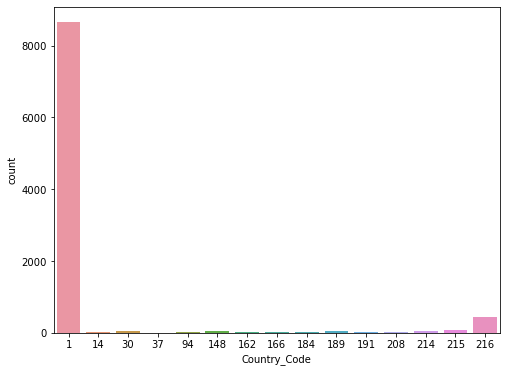

In [25]:
#Visualizing country_code
plt.figure(figsize=(8,6))
sns.countplot('Country_Code', data = df)
plt.show()

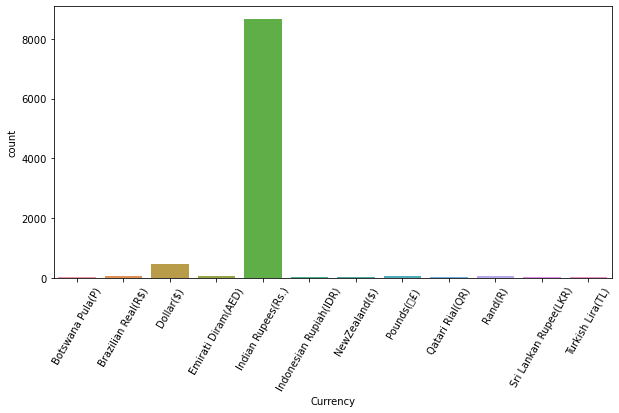

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64


In [26]:

plt.figure(figsize=(10,5))
sns.countplot(df["Currency"])
plt.xticks(rotation=60)
plt.show()
print(df['Currency'].value_counts())

indian currency is the most usable currency system.

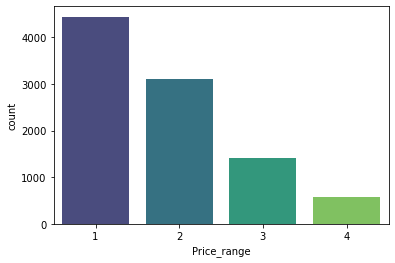

In [27]:
#Visualizing Price range
sns.countplot('Price_range', data = df, palette = 'viridis')
plt.show()

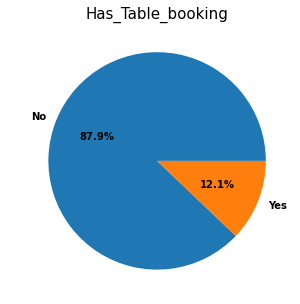

In [28]:
#Visualizing has table booking
plt.subplots(figsize=(8,5))
df['Has_Table_booking'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Has_Table_booking', fontsize=15)
plt.ylabel( ' ')
plt.show()

No     7100
Yes    2451
Name: Has_Online_delivery, dtype: int64


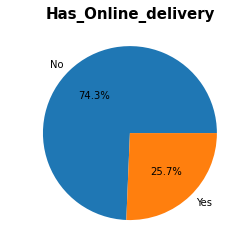

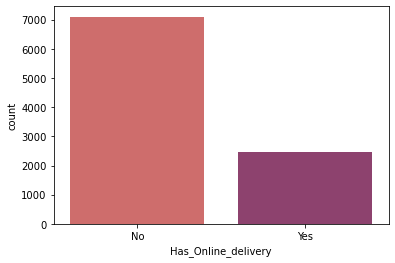

In [29]:
#Visualizing has online delivery
print(df['Has_Online_delivery'].value_counts())
df['Has_Online_delivery'].value_counts().plot.pie(autopct='%2.1f%%')
plt.title('Has_Online_delivery', fontsize=15,fontweight ='bold')
plt.ylabel( ' ')
plt.show()


sns.countplot('Has_Online_delivery', data = df, palette = 'flare')
plt.show()

'NO' count has more in numbers than yes count

In [30]:
#Checking which countries has online delivery option
option = df[df['Has_Online_delivery'] == 'Yes'].Country.value_counts()

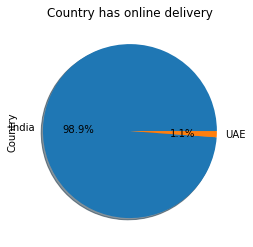

In [31]:
#Visualizing percentage to online delivery option by country
option.plot.pie(autopct = '%1.1f%%', shadow = True)
plt.title('Country has online delivery')
plt.show()

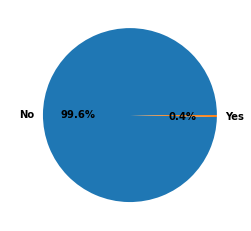

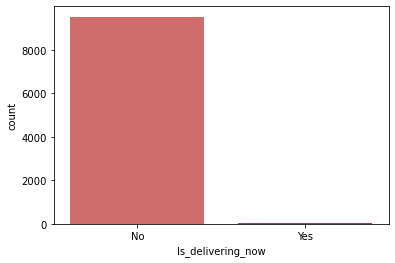

In [32]:
#Is_delivering_now
df['Is_delivering_now'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.ylabel( ' ')
plt.show()

#Visualizing is delivering now
sns.countplot('Is_delivering_now', data = df,palette='flare')
plt.show()

delivery option is not available for most of the places

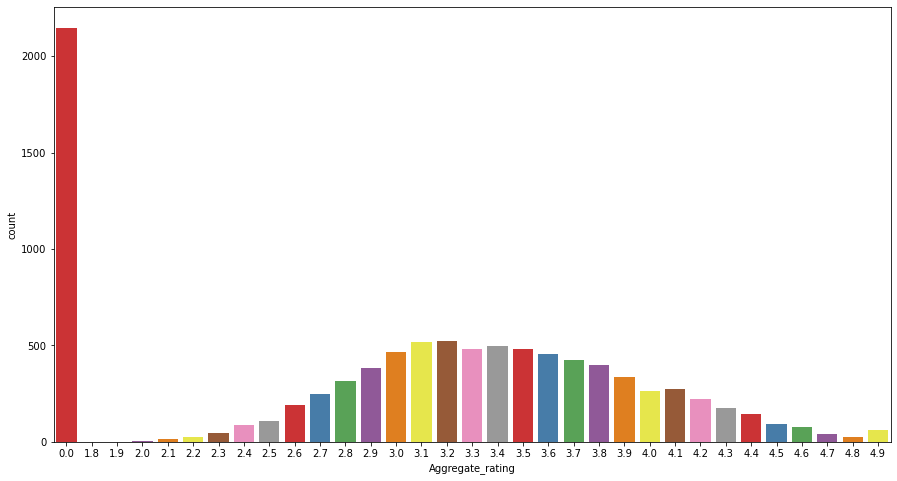

In [33]:
#Visualing Aggregate rating
plt.figure(figsize = (15,8))
sns.countplot('Aggregate_rating', data = df,palette = 'Set1')
plt.show()

- Most of the customers have given 0 as aggregate rating.
- 3.1 and 3.2 are most given ratings.

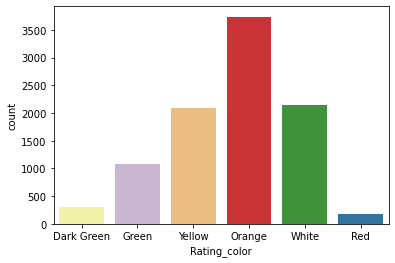

In [34]:
#Visualing rating color
sns.countplot('Rating_color', data = df,palette = 'Paired_r')
plt.show()

ratings in orange color has more numbers than others

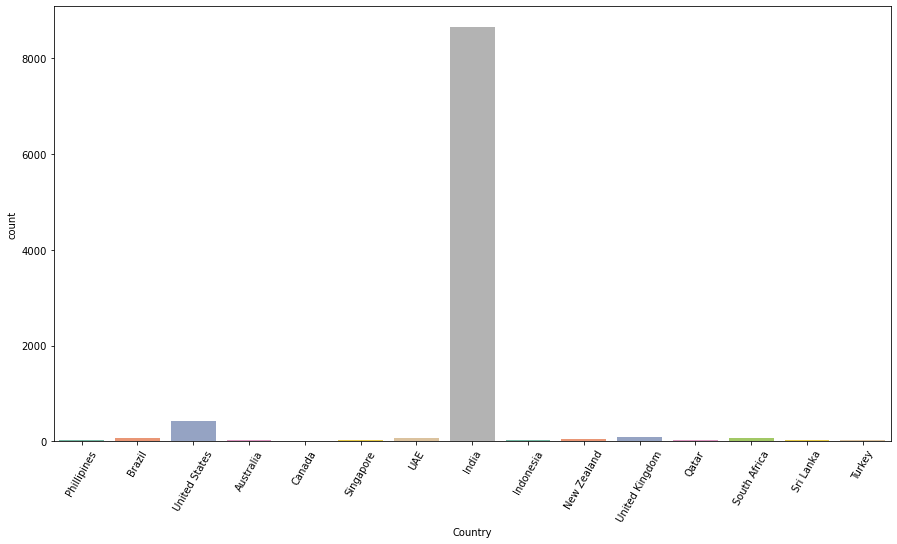

In [35]:
#Visualing Country
plt.figure(figsize = (15,8))
sns.countplot('Country', data = df, palette = 'Set2')
plt.xticks(rotation = 60)
plt.show()

zomato has strong market in india and then in US.

In [36]:
#Find top 10 location
val = df.Locality.value_counts().values
label = df.Locality.value_counts().index

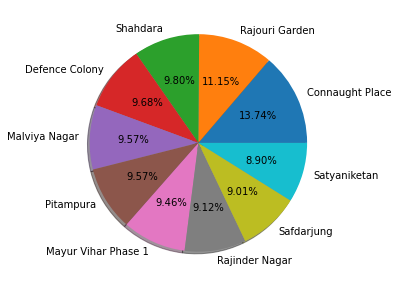

In [37]:
#Visualizing top 10 location
plt.figure(figsize=(10,5))
plt.pie(val[:10], labels = label[:10], autopct = '%1.2f%%', shadow = True)
plt.show()

In [38]:
#Finding top 15 cuisine
cuisine_val = df.Cuisines.value_counts().values
cuisine_label = df.Cuisines.value_counts().index

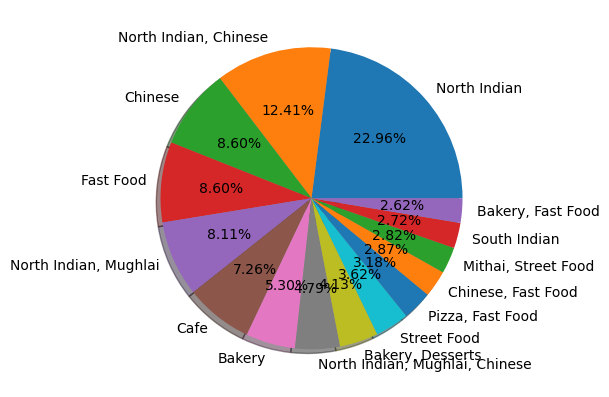

In [39]:
#Visualizing cuisines
plt.figure(figsize=(10,5),dpi=100)
plt.pie(cuisine_val[:15], labels = cuisine_label[:15], autopct = '%1.2f%%', shadow = True)
plt.show()

In [40]:
city_values = df.City.value_counts().values
city_lables = df.City.value_counts().index

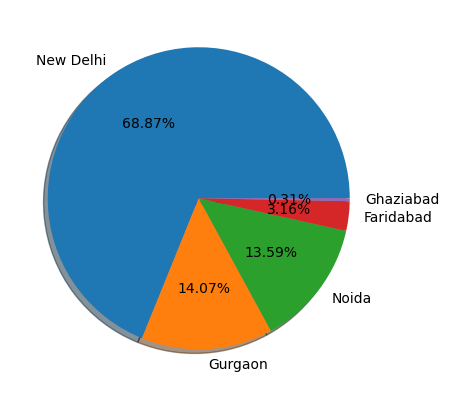

In [41]:
#Visualizing City
plt.figure(figsize=(10,5),dpi=100)
plt.pie(city_values[:5], labels = city_lables[:5], autopct = '%1.2f%%', shadow = True)
plt.show()

68.9% zomato presence is in delhi followed by Gurgaon then noida.

# 2. Bivaraiate and mutivariate analysis

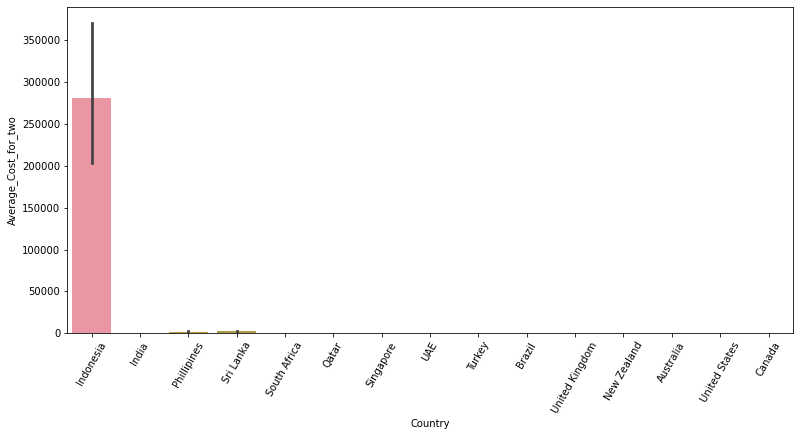

In [42]:
#Visualizing country by average cost for two
plt.figure(figsize = (13,6))
price = df.sort_values(by = 'Average_Cost_for_two', ascending  = False)
sns.barplot(x = 'Country', y = 'Average_Cost_for_two', data = price)
plt.xticks(rotation = 60)
plt.show()

surprisingly the cost of food delivered by zomato is highest in indonesia

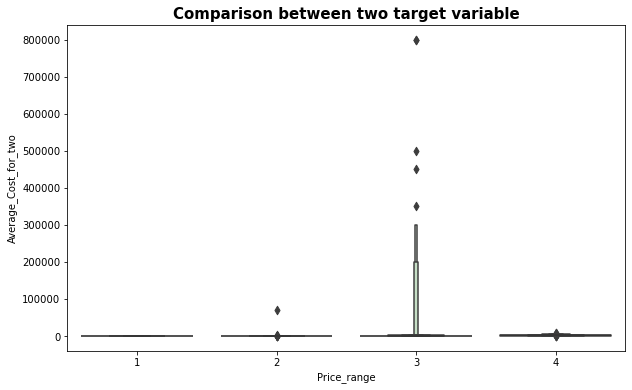

In [43]:
plt.figure(figsize=(10,6))
sns.boxenplot(y = "Average_Cost_for_two", x= "Price_range", data = df)
plt.title('Comparison between two target variable', fontsize=15, fontweight='bold')
plt.show()

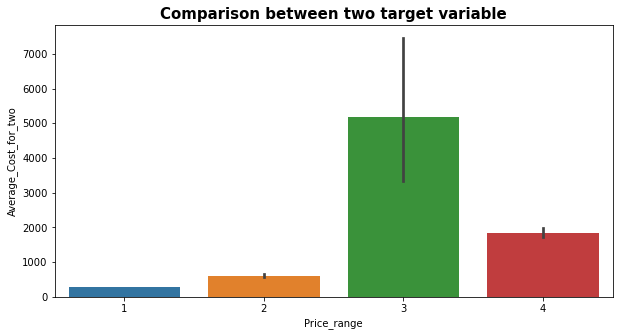

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(y = "Average_Cost_for_two", x= "Price_range", data = df)
plt.title('Comparison between two target variable', fontsize=15, fontweight='bold')
plt.show()

observation:
-    Average_Cost_for_two is lowest for the price range 1.
-     Maximum Average_Cost_for_two is for price range 3 followed by 4 and then 2.
-     Outliers are present maximum in 3.

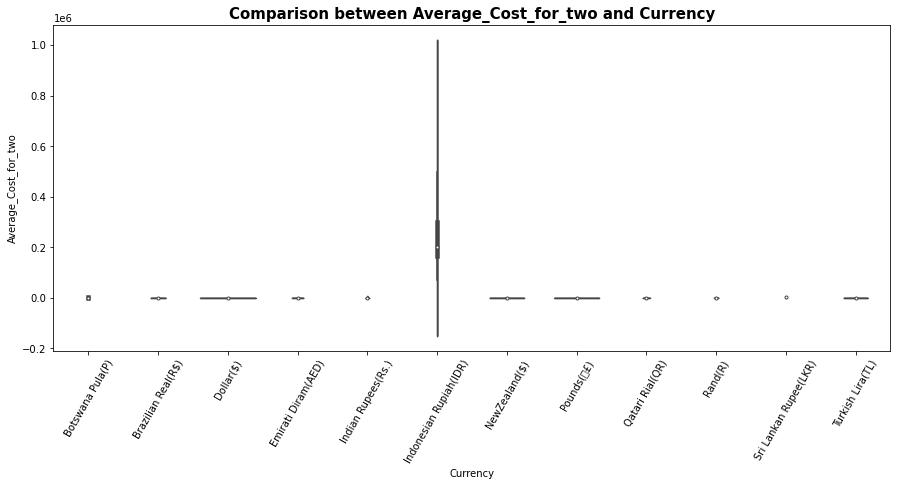

In [45]:
plt.figure(figsize=(15,6))
sns.violinplot(y = "Average_Cost_for_two", x= "Currency", data = df)
plt.title('Comparison between Average_Cost_for_two and Currency', fontsize=15, fontweight='bold')
plt.xticks(rotation=60)
plt.show()

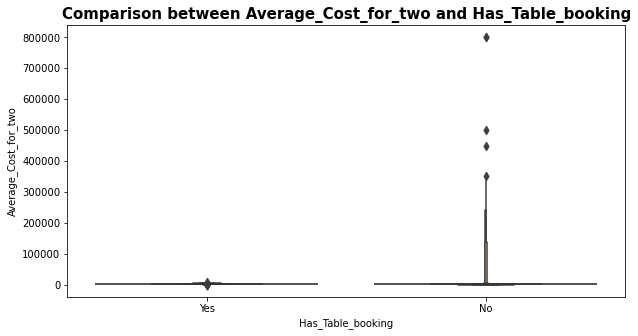

In [46]:
plt.figure(figsize=(10,5))
sns.boxenplot(y = "Average_Cost_for_two", x= "Has_Table_booking", data = df)
plt.title('Comparison between Average_Cost_for_two and Has_Table_booking', fontsize=15, fontweight='bold')
plt.show()

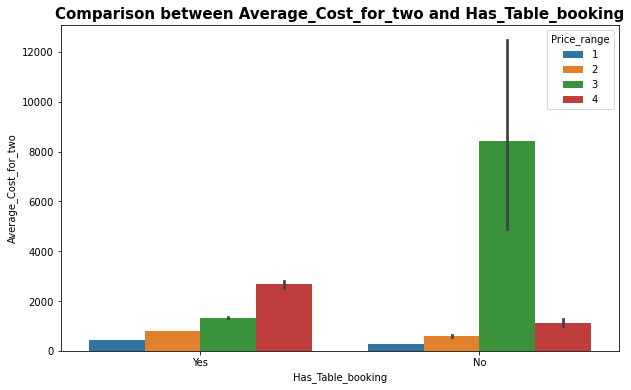

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(y = "Average_Cost_for_two", x= "Has_Table_booking", data = df, hue= 'Price_range')
plt.title('Comparison between Average_Cost_for_two and Has_Table_booking', fontsize=15, fontweight='bold')
plt.show()

observation
- Maximum customer have no booking of their table.
- Interestingly, the restaurant with price range level 4 have maximum table booking. The customers who have decided to go for a high price restaurent, booked their table previously.

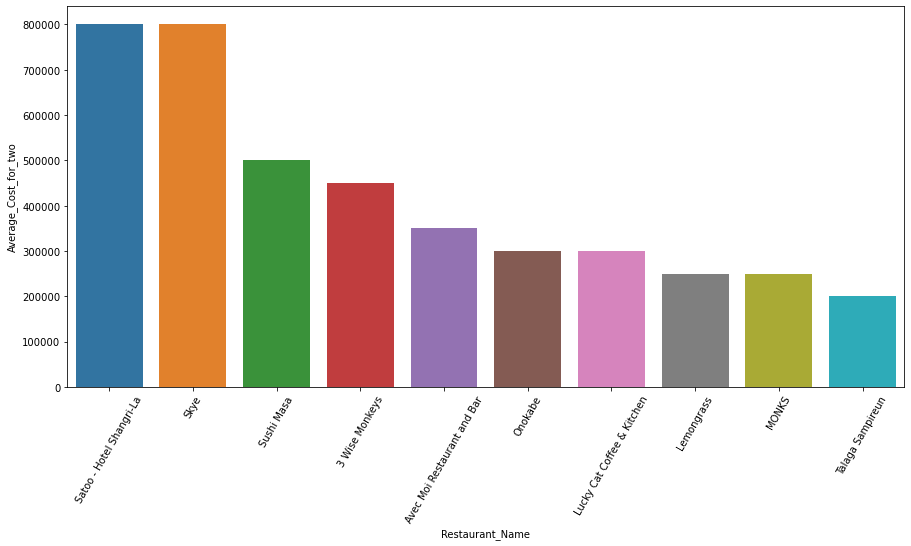

In [48]:
#Visualizing resturant name by average cost for two
plt.figure(figsize = (15,7))
cost = df.sort_values(by = 'Average_Cost_for_two', ascending  = False).iloc[0:10]
sns.barplot(x = 'Restaurant_Name', y = 'Average_Cost_for_two', data = cost)
plt.xticks(rotation = 60)
plt.show()

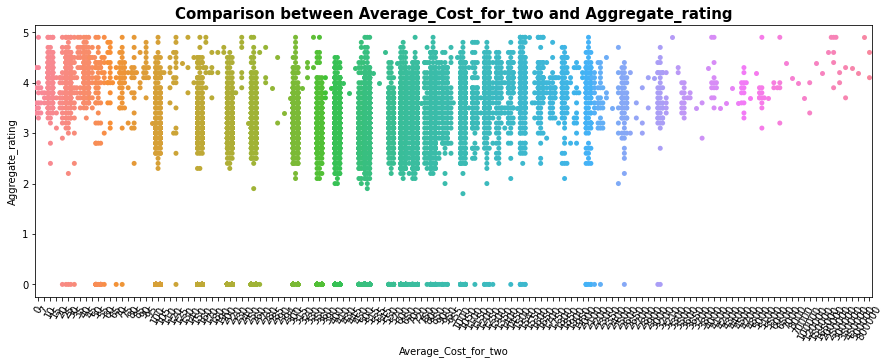

In [49]:
plt.figure(figsize=(15,5))
sns.swarmplot(x = "Average_Cost_for_two", y = "Aggregate_rating", data = df)
plt.title('Comparison between Average_Cost_for_two and Aggregate_rating', fontsize=15, fontweight='bold')
plt.xticks(rotation = 60)
plt.show()

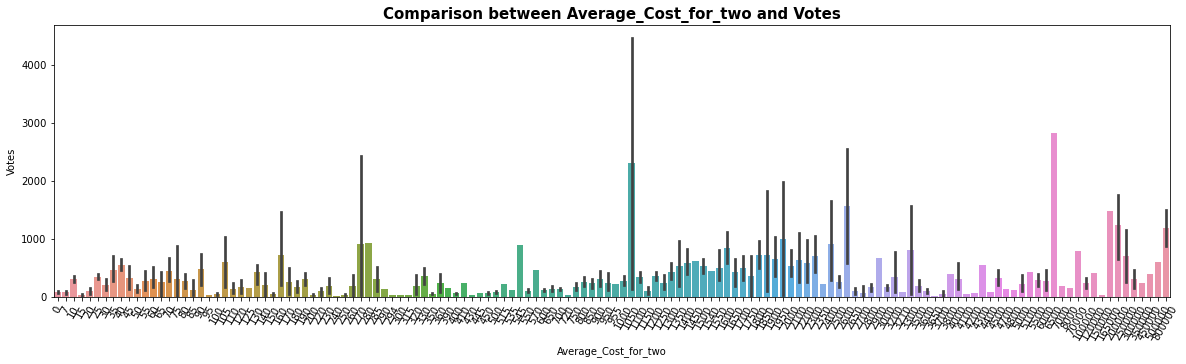

In [50]:
plt.figure(figsize=(20,5))
sns.barplot(x = "Average_Cost_for_two", y = "Votes", data = df)
plt.title('Comparison between Average_Cost_for_two and Votes', fontsize=15, fontweight='bold')
plt.xticks(rotation=60)
plt.show()

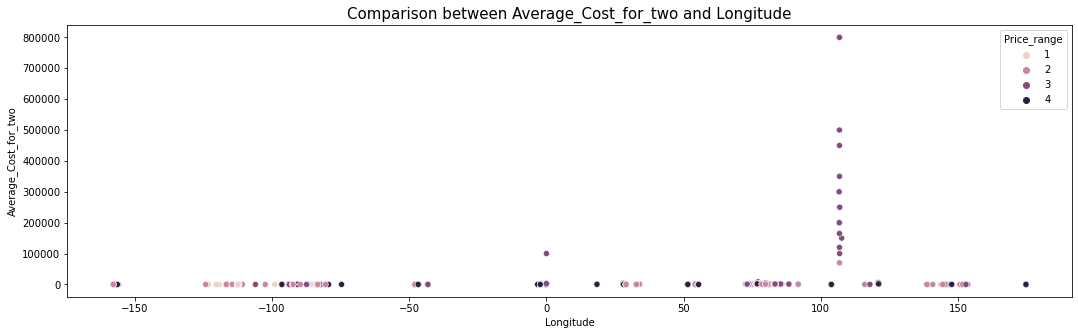

In [51]:
plt.figure(figsize=(18,5))
sns.scatterplot(y = "Average_Cost_for_two", x= "Longitude", data = df, hue= 'Price_range')
plt.title('Comparison between Average_Cost_for_two and Longitude', fontsize=15)
plt.show()

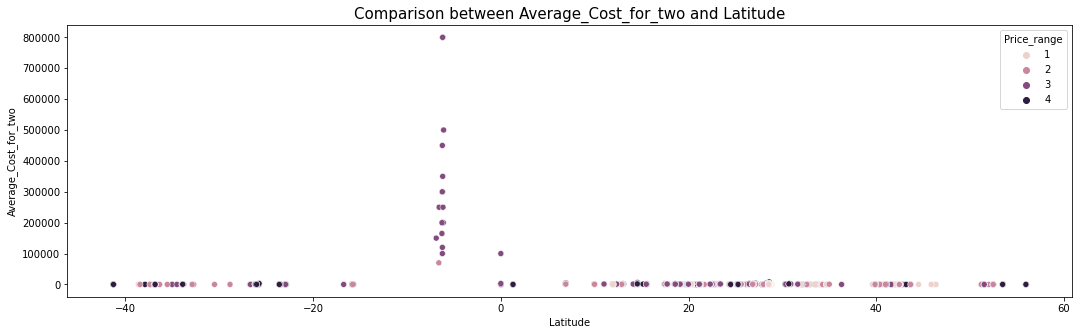

In [52]:
plt.figure(figsize=(18,5))
sns.scatterplot(y = "Average_Cost_for_two", x= "Latitude", data = df, hue= 'Price_range')
plt.title('Comparison between Average_Cost_for_two and Latitude', fontsize=15)
plt.show()

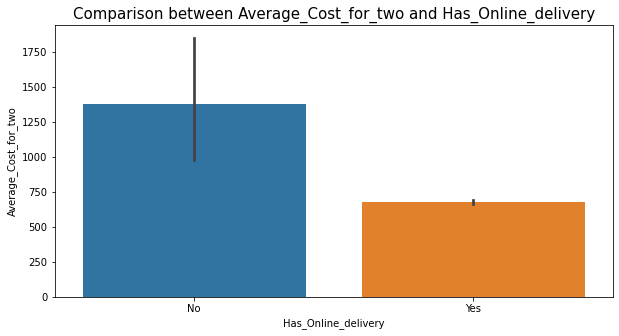

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(y = "Average_Cost_for_two", x= "Has_Online_delivery", data = df)
plt.title('Comparison between Average_Cost_for_two and Has_Online_delivery', fontsize=15)
plt.show()

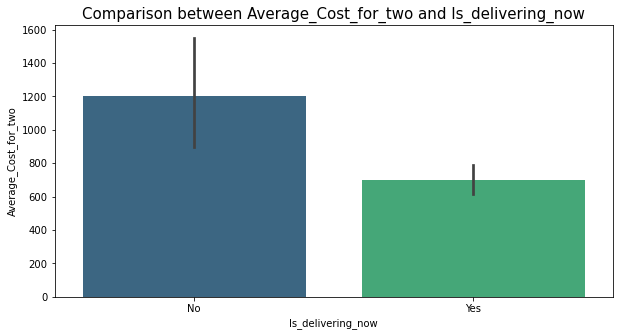

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(y = "Average_Cost_for_two", x= "Is_delivering_now", data = df,palette='viridis')
plt.title('Comparison between Average_Cost_for_two and Is_delivering_now', fontsize=15)
plt.show()

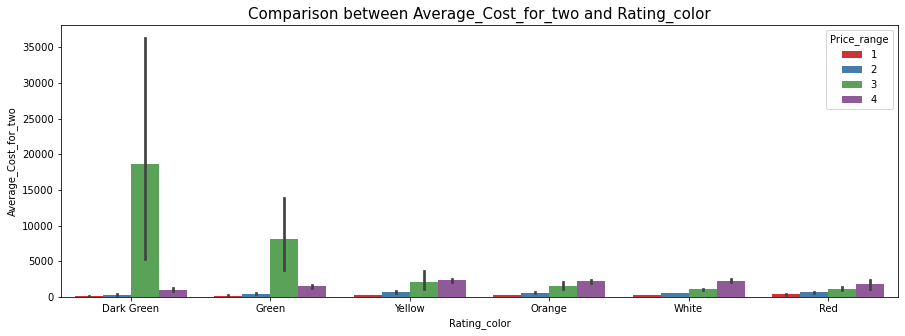

In [55]:
plt.figure(figsize=(15,5))
sns.barplot(y = "Average_Cost_for_two", x= "Rating_color", data = df, hue= 'Price_range',palette='Set1')
plt.title('Comparison between Average_Cost_for_two and Rating_color', fontsize=15)
plt.show()

average cost of two for price range 3 is high than any other in price ranges.

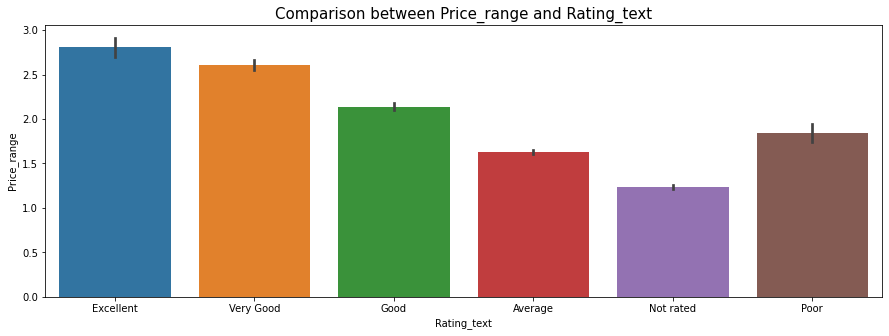

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(y = "Price_range", x= "Rating_text", data = df)
plt.title('Comparison between Price_range and Rating_text', fontsize=15)
plt.show()

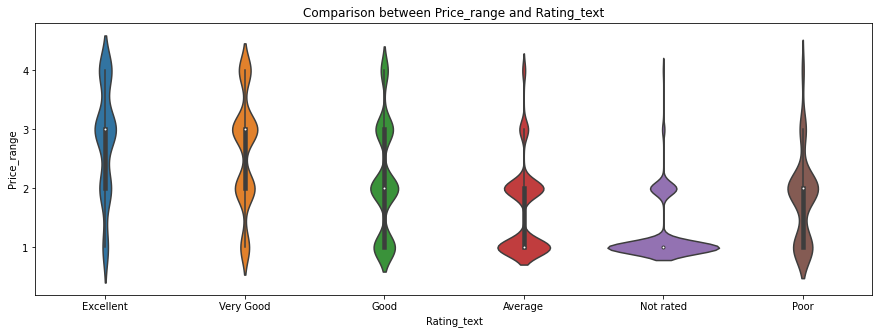

In [57]:
plt.figure(figsize=(15,5))
sns.violinplot(y = "Price_range", x= "Rating_text", data = df)
plt.title('Comparison between Price_range and Rating_text')
plt.show()

In [58]:
pd.crosstab([df.Price_range],df["Rating_text"],margins=True)

Rating_text,Average,Excellent,Good,Not rated,Poor,Very Good,All
Price_range,,,,,,,
1,1898,32,608,1700,62,144,4444
2,1425,69,794,402,98,325,3113
3,313,126,498,35,20,416,1408
4,101,74,200,11,6,194,586
All,3737,301,2100,2148,186,1079,9551


observation
- Price_range is high for Excellent Rating_text. It is quite obvious.
- Total 2148 restaurents are not rated.
- Maximum restaurent are Average.

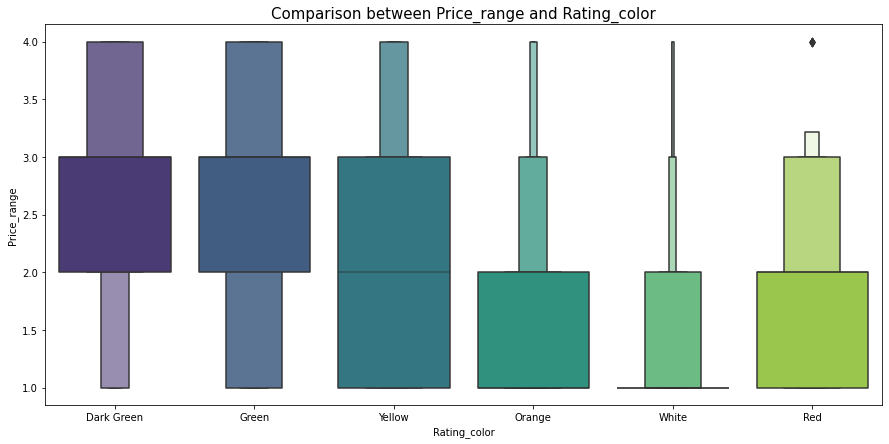

In [59]:
plt.figure(figsize=(15,7))
sns.boxenplot(y = "Price_range", x= "Rating_color", data = df,palette = 'viridis')
plt.title('Comparison between Price_range and Rating_color', fontsize=15)
plt.show()

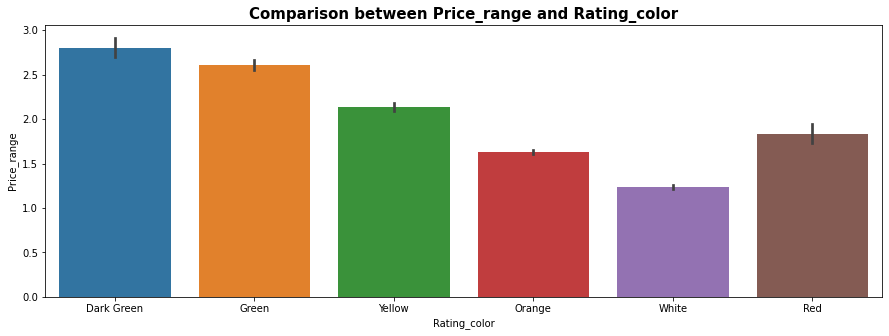

In [60]:
plt.figure(figsize=(15,5))
sns.barplot(y = "Price_range", x= "Rating_color", data = df)
plt.title('Comparison between Price_range and Rating_color', fontsize=15, fontweight='bold')
plt.show()

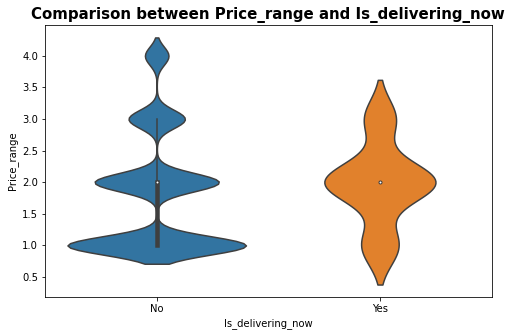

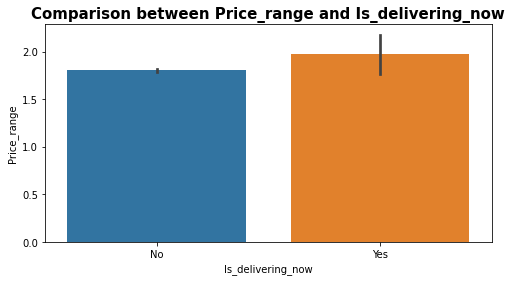

In [61]:
plt.figure(figsize=(8,5))
sns.violinplot(y = "Price_range", x= "Is_delivering_now", data = df)
plt.title('Comparison between Price_range and Is_delivering_now', fontsize=15, fontweight='bold')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(y = "Price_range", x= "Is_delivering_now", data = df)
plt.title('Comparison between Price_range and Is_delivering_now', fontsize=15, fontweight='bold')
plt.show()

observation
- Maximum Price_range is for Darkgreen color.
- Green stands for Excelent and Red stands for Poor.
- No specific relation is found between Price_range and Is_delivering_now.

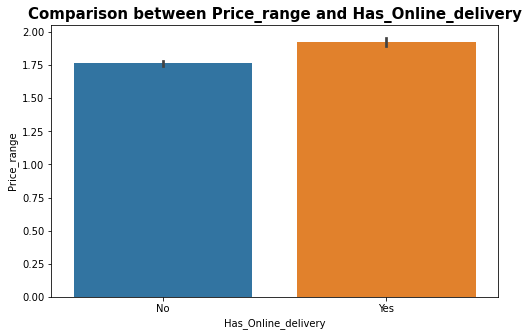

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(y = "Price_range", x= "Has_Online_delivery", data = df)
plt.title('Comparison between Price_range and Has_Online_delivery', fontsize=15, fontweight='bold')
plt.show()

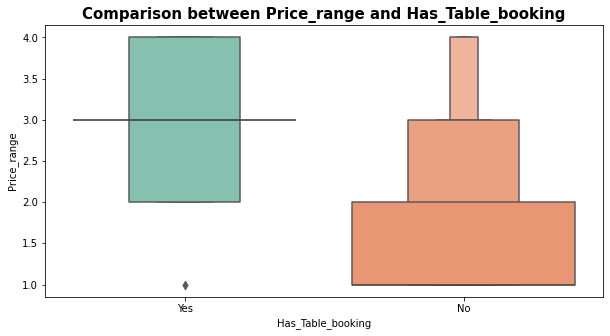

In [63]:
plt.figure(figsize=(10,5))
sns.boxenplot(y = "Price_range", x= "Has_Table_booking", data = df,palette='Set2')
plt.title('Comparison between Price_range and Has_Table_booking', fontsize=15, fontweight='bold')
plt.show()

observation:
- Avg price range is high for Has_Table_booking equal to Yes.
- No specific relation is found between Price_range and Has_Online_delivery.

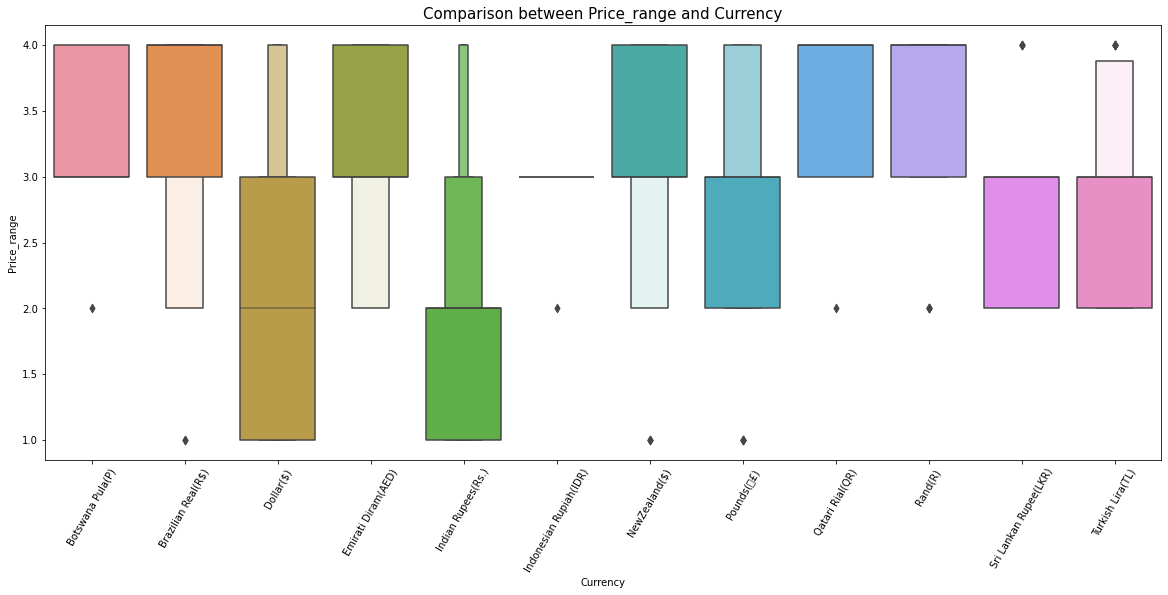

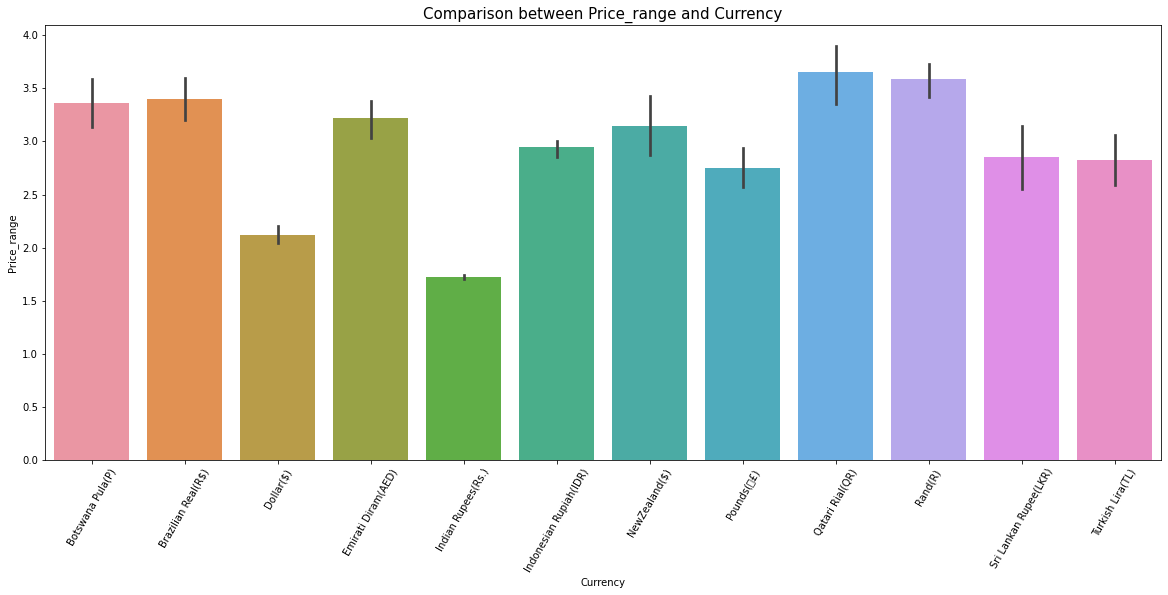

In [64]:
plt.figure(figsize=(20,8))
sns.boxenplot(y = "Price_range", x= "Currency", data = df)
plt.title('Comparison between Price_range and Currency', fontsize=15)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(20,8))
sns.barplot(y = "Price_range", x= "Currency", data = df)
plt.title('Comparison between Price_range and Currency', fontsize=15)
plt.xticks(rotation=60)
plt.show()

- Prices range is low for Indian Rupees(Rs).
- Prices range is high for Qatari Rial(QR).

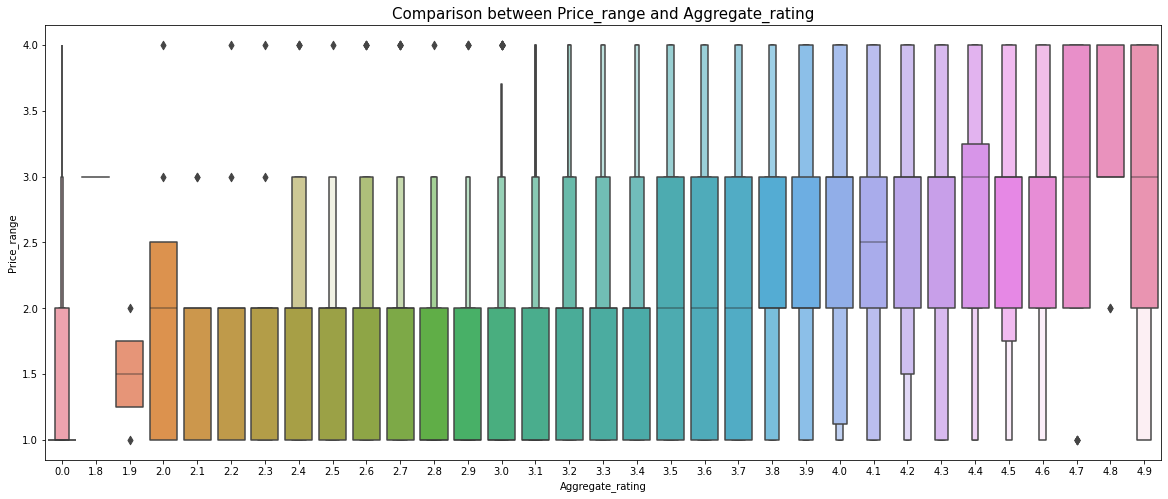

In [65]:
plt.figure(figsize=(20,8))
sns.boxenplot(y = "Price_range", x= "Aggregate_rating", data = df)
plt.title('Comparison between Price_range and Aggregate_rating', fontsize=15)
plt.show()

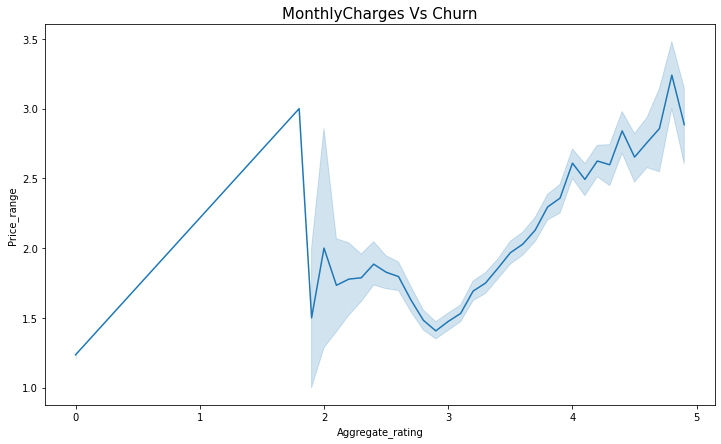

In [66]:
plt.figure(figsize=(12,7))
sns.lineplot(y="Price_range", x='Aggregate_rating',data=df)
plt.title('MonthlyCharges Vs Churn', fontsize=15)
plt.show()

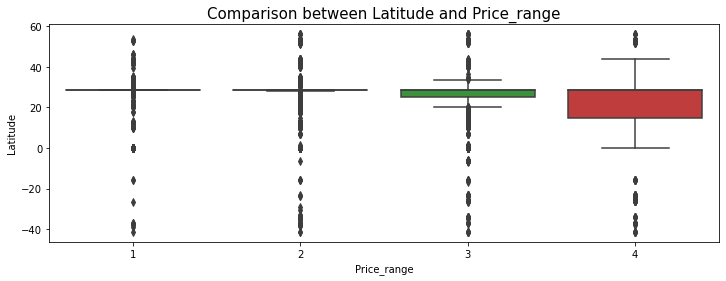

In [67]:
plt.figure(figsize=(12,4))
sns.boxplot(y = "Latitude", x= "Price_range", data = df)
plt.title('Comparison between Latitude and Price_range', fontsize=15)
plt.show()

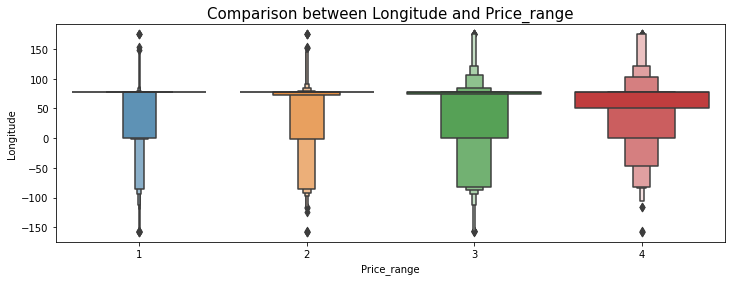

In [68]:
plt.figure(figsize=(12,4))
sns.boxenplot(y = "Longitude", x= "Price_range", data = df)
plt.title('Comparison between Longitude and Price_range', fontsize=15)
plt.show()

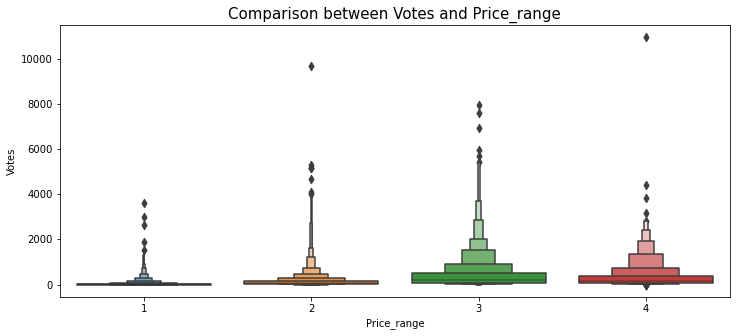

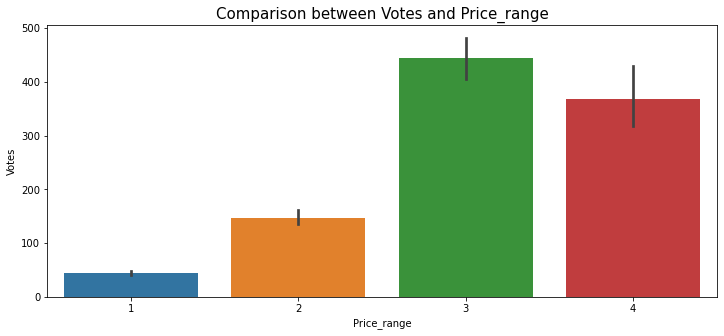

In [69]:
plt.figure(figsize=(12,5))
sns.boxenplot(y = "Votes", x= "Price_range", data = df)
plt.title('Comparison between Votes and Price_range', fontsize=15)
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(y = "Votes", x= "Price_range", data = df)
plt.title('Comparison between Votes and Price_range', fontsize=15)
plt.show()

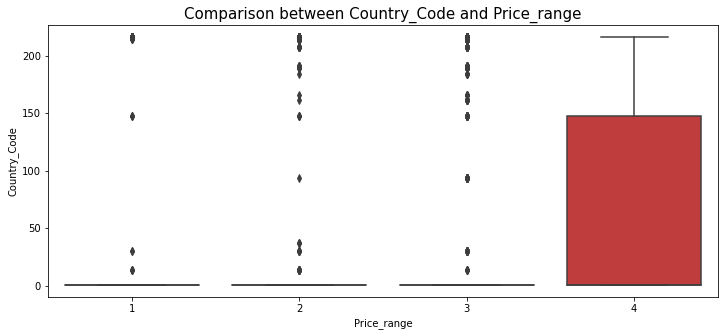

In [70]:
plt.figure(figsize=(12,5))
sns.boxplot(y = "Country_Code", x= "Price_range", data = df)
plt.title('Comparison between Country_Code and Price_range', fontsize=15)
plt.show()

# Now encoding the categorical data

In [88]:
df.drop('Locality_Verbose',axis=1,inplace= True)

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
cat_features= ['Restaurant_Name', 'City', 'Address', 'Locality', 'Cuisines', 'Country',
             'Currency', 'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now', 'Rating_color', 'Rating_text']

In [91]:
lab_enc = LabelEncoder()
for i in cat_features:
    df[i] = lab_enc.fit_transform(df[i])
df.head()

,Restaurant_Name,Country_Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,3749,162,73,8685,171,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,3173,162,73,6055,593,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,2897,162,75,4684,308,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,4707,162,75,8690,862,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6
4,5523,162,75,8689,862,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229,6


In [92]:
df.shape

(9551, 19)

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_Name,9551.0,3653.204586,2142.917876,0.000000,1777.500000,3595.000000,5485.500000,7445.000000
Country_Code,9551.0,18.365616,56.750546,1.000000,1.000000,1.000000,1.000000,216.000000
City,9551.0,78.301434,23.198915,0.000000,76.000000,88.000000,88.000000,140.000000
Address,9551.0,4542.439430,2565.717005,0.000000,2323.500000,4610.000000,6746.500000,8917.000000
Locality,9551.0,658.128468,315.866515,0.000000,381.000000,696.000000,921.000000,1207.000000
Longitude,9551.0,64.126574,41.467058,-157.948486,77.081343,77.191964,77.282006,174.832089
Latitude,9551.0,25.854381,11.007935,-41.330428,28.478713,28.570469,28.642758,55.976980
Cuisines,9551.0,989.461732,514.176108,0.000000,497.000000,1127.000000,1353.500000,1824.000000
Average_Cost_for_two,9551.0,1199.210763,16121.183073,0.000000,250.000000,400.000000,700.000000,800000.000000
Currency,9551.0,3.977699,0.914242,0.000000,4.000000,4.000000,4.000000,11.000000


observation
- 'votes' column has huge jump from 75% to maximum
- Average cost for two has also shows huge jump from 75% to max

# Correlation

In [94]:
df.corr()

,Restaurant_Name,Country_Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
Restaurant_Name,1.000000,0.020012,-0.001399,0.000763,0.004322,-0.001920,0.009922,0.051679,0.019241,0.009669,0.041173,0.028082,0.011984,0.061275,0.029367,-0.007311,0.012131,0.018512,0.017560
Country_Code,0.020012,1.000000,-0.181728,-0.220342,-0.120075,-0.698299,0.019792,-0.132902,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,0.243327,0.282189,-0.187174,0.222685,0.154530,0.968700
City,-0.001399,-0.181728,1.000000,-0.019763,0.096444,0.117391,-0.004301,0.026614,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.132163,0.110887,-0.098985,-0.078406,-0.180959
Address,0.000763,-0.220342,-0.019763,1.000000,0.159555,0.185801,-0.038654,0.023944,0.022749,0.069499,0.006428,0.029874,0.031267,-0.034952,-0.151153,0.071264,-0.008029,-0.101754,-0.235815
Locality,0.004322,-0.120075,0.096444,0.159555,1.000000,0.086448,-0.020424,0.006993,-0.012136,0.023723,-0.065594,-0.030993,-0.007299,-0.114459,-0.174336,0.036831,-0.036969,-0.123569,-0.118784
Longitude,-0.001920,-0.698299,0.117391,0.185801,0.086448,1.000000,0.043207,0.126197,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.116818,0.059979,-0.181466,-0.085101,-0.766221
Latitude,0.009922,0.019792,-0.004301,-0.038654,-0.020424,0.043207,1.000000,0.038151,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.166688,0.000516,0.042590,-0.129447,-0.022962,0.181299
Cuisines,0.051679,-0.132902,0.026614,0.023944,0.006993,0.126197,0.038151,1.000000,0.005831,0.068912,0.050639,-0.016639,0.007773,-0.005350,-0.080331,-0.016228,-0.079979,-0.032719,-0.127955
Average_Cost_for_two,0.019241,0.043225,-0.028838,0.022749,-0.012136,0.045891,-0.111088,0.005831,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.051792,-0.049970,0.031439,0.067783,-0.004034
Currency,0.009669,-0.033466,-0.071996,0.069499,0.023723,0.337334,-0.101864,0.068912,0.045615,1.000000,0.000640,0.006991,0.001458,0.075179,-0.006939,-0.040430,0.014598,-0.027111,-0.105296


In [95]:
#Checking correlation between features
df.corr()['Average_Cost_for_two'].sort_values()

Latitude               -0.111088
Rating_color           -0.049970
City                   -0.028838
Has_Online_delivery    -0.018974
Locality               -0.012136
Country                -0.004034
Is_delivering_now      -0.001862
Cuisines                0.005831
Has_Table_booking       0.007758
Restaurant_Name         0.019241
Address                 0.022749
Rating_text             0.031439
Country_Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate_rating        0.051792
Votes                   0.067783
Price_range             0.075083
Average_Cost_for_two    1.000000
Name: Average_Cost_for_two, dtype: float64

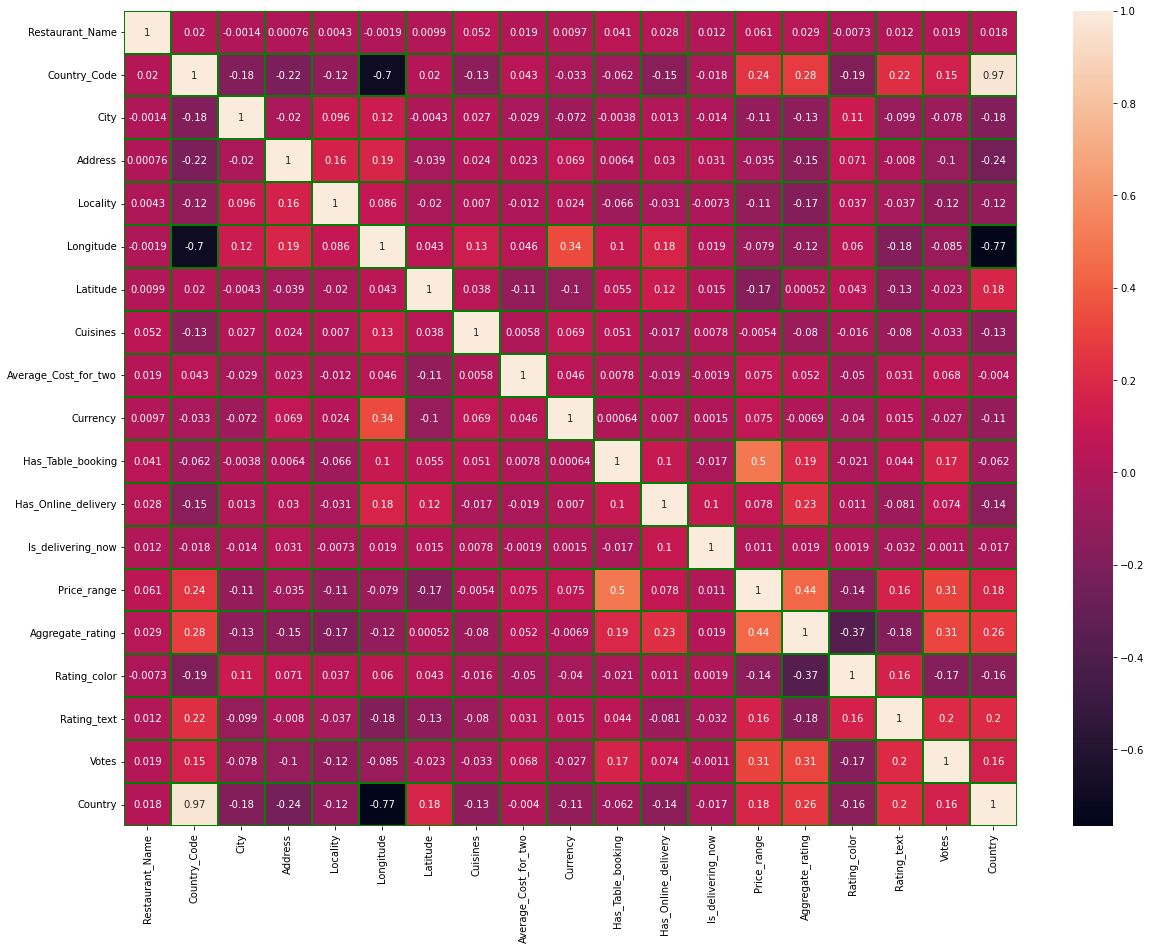

In [96]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot= True, linecolor= "green",  linewidths= 2)
plt.show()

# TARGET 1
Correlation with Other features with Average_Cost_for_two :

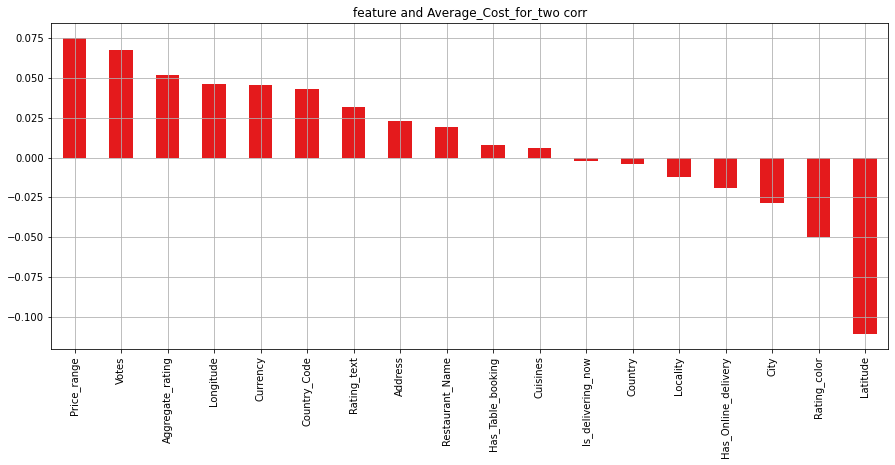

In [97]:
df.drop("Average_Cost_for_two", axis=1).corrwith(df["Average_Cost_for_two"]).sort_values(ascending=False).plot(kind='bar',
        figsize=(15,6),grid='True',title='feature and Average_Cost_for_two corr',cmap= 'Set1')
plt.show()

from the above it has been observed that price range and votes has strong positive correlation with average cost while
latitude and rating color has strong negative relarion with the target columns

# TARGET = 2
Correlation of Other features with Price_range:

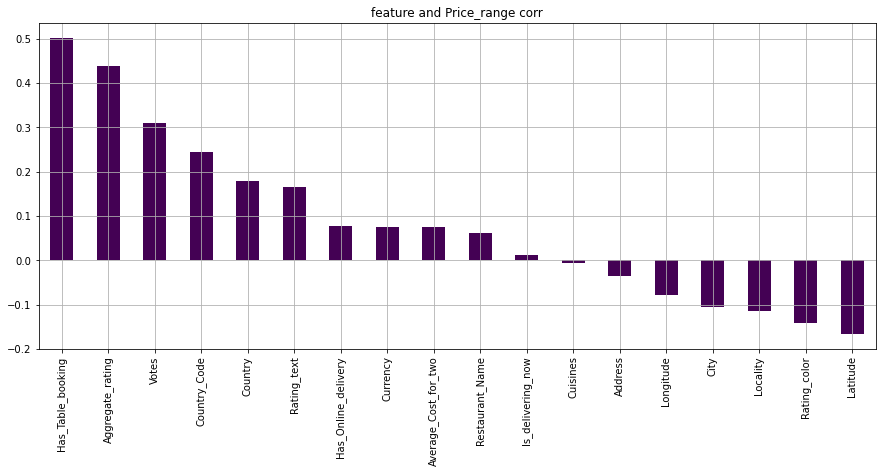

In [98]:
df.drop("Price_range", axis=1).corrwith(df["Price_range"]).sort_values(ascending=False).plot(kind='bar',
        figsize=(15,6),grid='True',title='feature and Price_range corr',cmap='viridis')
plt.show()

from the above it has been observed that has table booking and aggregate rating and has strong positive correlation with price range while latitude and rating color has strong negative relarion with the target columns

# checking skewness

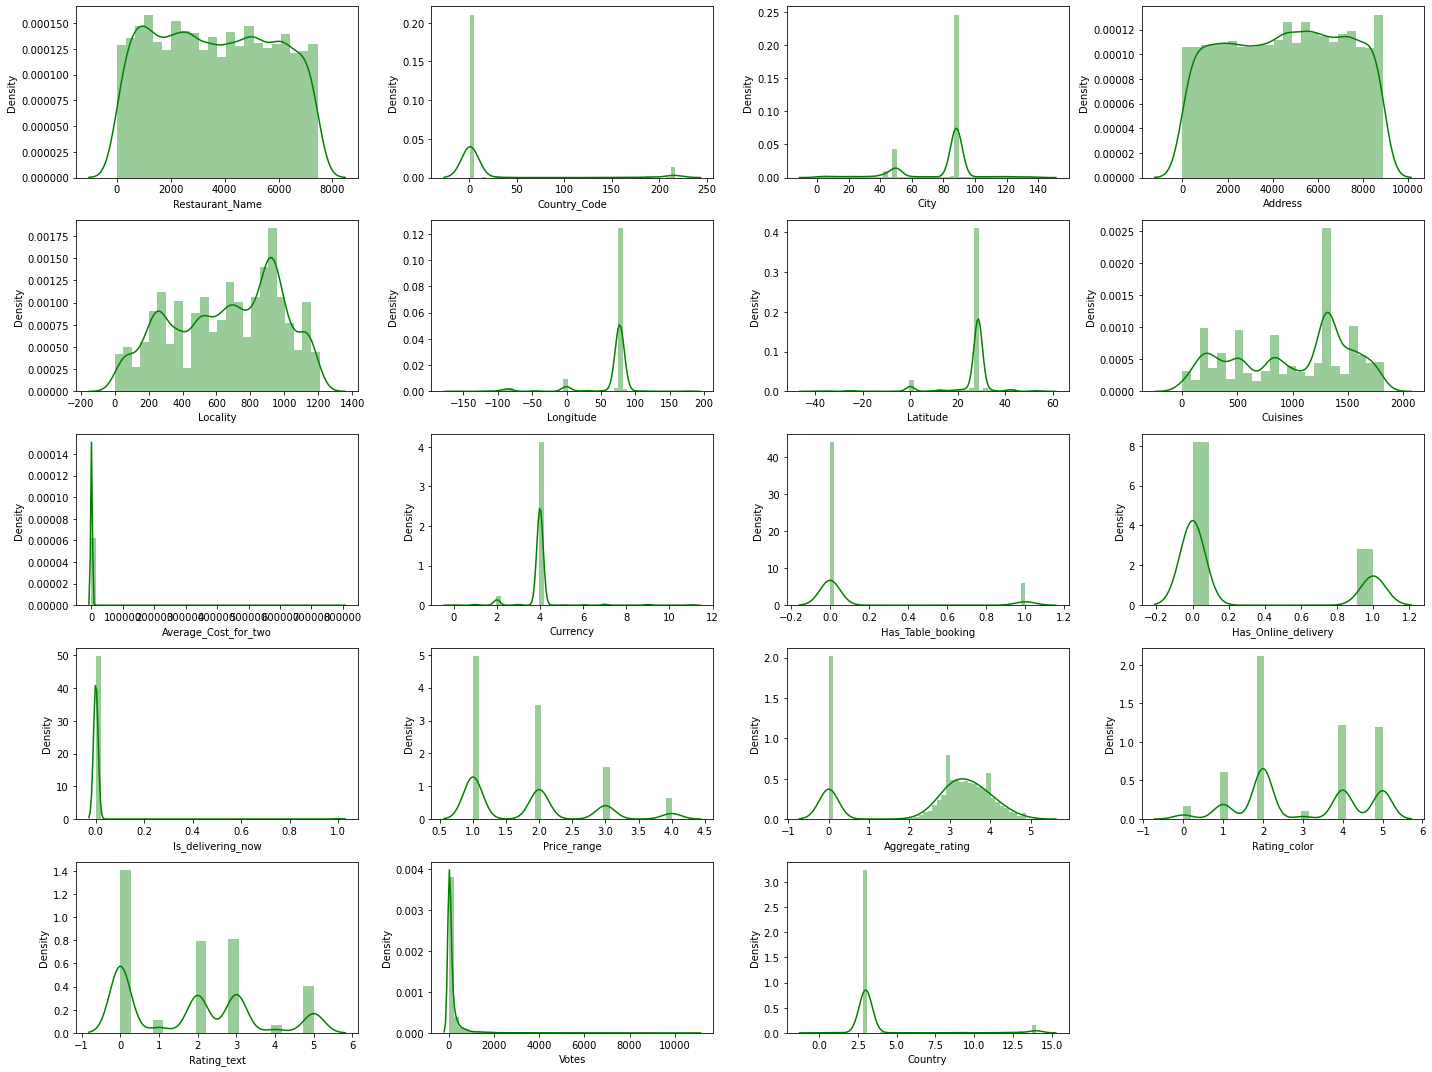

In [99]:
plt.figure(figsize = (20,15))
plotnumber = 1

for i in df:
    plt.subplot(5,4, plotnumber)
    sns.distplot(df[i], color = 'g')
    plt.xlabel(i, fontsize = 10)
    plotnumber += 1    
    plt.tight_layout()

some skweness has been observed in many columns

In [100]:
df.skew()

Restaurant_Name          0.044637
Country_Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average_Cost_for_two    35.477915
Currency                 2.858093
Has_Table_booking        2.321100
Has_Online_delivery      1.114620
Is_delivering_now       16.673412
Price_range              0.889618
Aggregate_rating        -0.954130
Rating_color             0.046009
Rating_text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

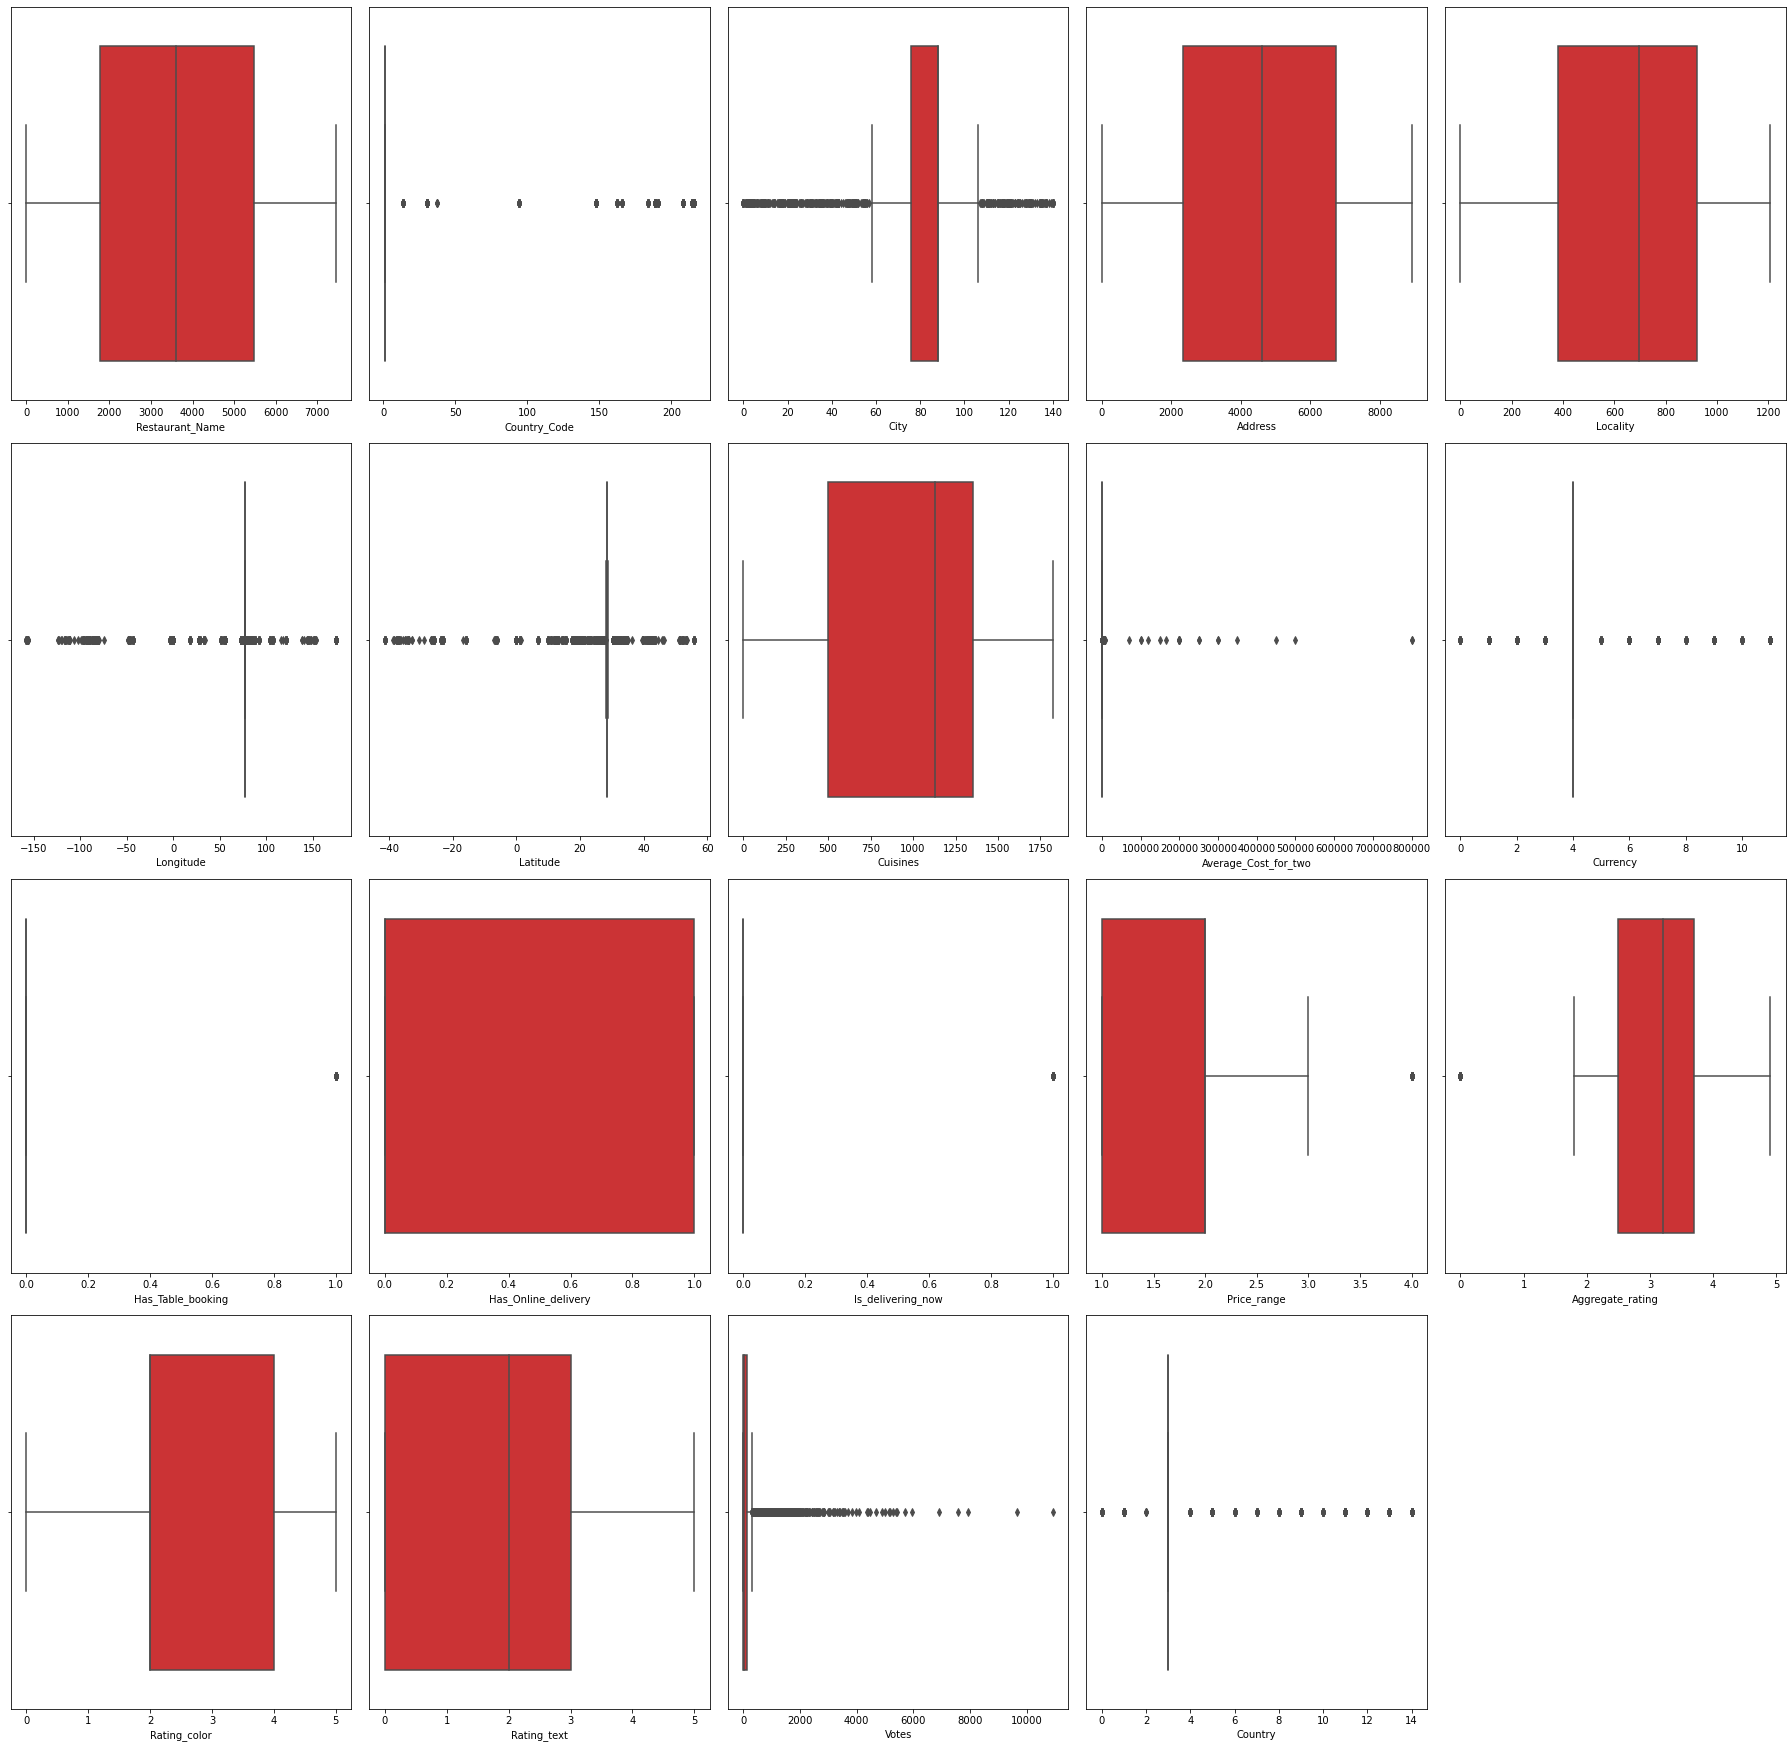

In [101]:
plt.figure(figsize = (25,30))
plotnumber = 1

for i in df:
    plt.subplot(5,5, plotnumber)
    sns.boxplot(df[i], palette = 'Set1')
    plt.xlabel(i, fontsize = 10)
    plotnumber += 1    
    plt.tight_layout()

mainly numerical features has no outliers and categorical features has outliers 

# Using zscore to remove outliers

In [104]:
#Removing skewness using zscore
from scipy.stats import zscore
z_score = zscore(df[['Average_Cost_for_two', 'Votes','Country','City']])
abs_zscore = np.abs(z_score)

a = (abs_zscore < 3).all(axis = 1)
data = df[a]

In [105]:
#Printing old and new datset shape
print('Old Data Shape', df.shape)
print('New Data Shape', data.shape)

Old Data Shape (9551, 19)
New Data Shape (8704, 19)


In [106]:
#Printing data loss after removing skewness
data_loss = (9551 - 8704)/9551 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  8.868181342267825


In [107]:
data.skew()

Restaurant_Name          0.046486
Country_Code             6.459914
City                    -1.195210
Address                 -0.121397
Locality                -0.304982
Longitude               -2.498700
Latitude                -3.675618
Cuisines                -0.326084
Average_Cost_for_two     3.688100
Currency                 4.498329
Has_Table_booking        2.300326
Has_Online_delivery      1.032427
Is_delivering_now       15.908839
Price_range              1.010721
Aggregate_rating        -0.877791
Rating_color             0.075107
Rating_text              0.434807
Votes                    3.584346
Country                  6.484821
dtype: float64

will treat skweness lateron 

# Dividing dataset into x and y variable

In [108]:
x = data.drop('Average_Cost_for_two', axis = 1)
y = data['Average_Cost_for_two']

In [109]:
print(x.shape)
print(y.shape)

(8704, 18)
(8704,)


# Data Standarisation

In [110]:
#Scaling x dataset using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [111]:
x.head()

,Restaurant_Name,Country_Code,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,0.050684,5.973425,-0.384242,1.571811,-1.634364,2.147662,-0.999568,-0.166203,-5.642124,2.673913,-0.609213,-0.062622,1.423572,1.497709,-2.148648,-0.409856,1.174663,3.63302
1,-0.218346,5.973425,-0.384242,0.533448,-0.258413,2.147069,-1.000668,0.211672,-5.642124,2.673913,-0.609213,-0.062622,1.423572,1.299625,-2.148648,-0.409856,2.667893,3.63302
2,-0.347256,5.973425,-0.279994,-0.007842,-1.187669,2.148956,-0.998071,1.319579,-5.642124,2.673913,-0.609213,-0.062622,2.558051,1.233597,-1.440111,2.042378,0.937472,3.63302
3,0.498133,5.973425,-0.279994,1.573785,0.618675,2.148940,-0.997704,0.241348,-5.642124,-0.373984,-0.609213,-0.062622,2.558051,1.563737,-2.148648,-0.409856,1.449590,3.63302
4,0.879258,5.973425,-0.279994,1.573390,0.618675,2.148986,-0.997786,0.233435,-5.642124,2.673913,-0.609213,-0.062622,2.558051,1.497709,-2.148648,-0.409856,0.716452,3.63302


# Checking Multicollinearity

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]

vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.009110,Restaurant_Name
1,14.340145,Country_Code
2,1.040242,City
3,1.051918,Address
4,1.056012,Locality
5,1.859170,Longitude
6,3.547930,Latitude
7,1.031158,Cuisines
8,3.539250,Currency
9,1.547411,Has_Table_booking


In [113]:
#Droping Country and Switch to order menu
x = x.drop(columns = ['Country'], axis = 1)

#Scaling x data after removing column ER
scaled = scaler.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.009109,Restaurant_Name
1,2.559720,Country_Code
2,1.038300,City
3,1.051169,Address
4,1.055517,Locality
5,1.572365,Longitude
6,2.284718,Latitude
7,1.031138,Cuisines
8,1.678489,Currency
9,1.544759,Has_Table_booking


muticollinearity problem resolved successfully

# Selecting Kbest Features

In [114]:
#Import SelectKbest and f_classif
from sklearn.feature_selection import SelectKBest, f_classif

#Selecting feature using kbest
best_feature = SelectKBest(score_func = f_classif, k = 'all')
fit = best_feature.fit(x,y)
datascores = pd.DataFrame(fit.scores_)
datacolumns = pd.DataFrame(x.columns)

In [115]:
fit = best_feature.fit(x,y)
datascores = pd.DataFrame(fit.scores_)
datacolumns = pd.DataFrame(x.columns)
datacolumns.head()
featureScores = pd.concat([datacolumns,datascores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

                Feature       Score
12          Price_range  490.077811
9     Has_Table_booking   83.062062
1          Country_Code   44.539982
6              Latitude   30.305689
16                Votes   21.457046
8              Currency   18.956336
13     Aggregate_rating   17.533914
10  Has_Online_delivery   10.068555
5             Longitude    7.054852
15          Rating_text    4.467797
2                  City    3.684907
14         Rating_color    3.130185
7              Cuisines    2.604232
4              Locality    2.482036
3               Address    2.414529
11    Is_delivering_now    2.034029
0       Restaurant_Name    1.461651


In [117]:
#Selecting best features based on their scores
x = x.drop(columns = ['Restaurant_Name']).copy()

In [119]:
x = x.drop(columns = ['Is_delivering_now']).copy()

# POWER TRANFORMER TO REMOVE SKEWNESS

In [120]:
x.skew()

Country_Code           6.459914
City                  -1.195210
Address               -0.121397
Locality              -0.304982
Longitude             -2.498700
Latitude              -3.675618
Cuisines              -0.326084
Currency               4.498329
Has_Table_booking      2.300326
Has_Online_delivery    1.032427
Price_range            1.010721
Aggregate_rating      -0.877791
Rating_color           0.075107
Rating_text            0.434807
Votes                  3.584346
dtype: float64

In [121]:
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method = 'yeo-johnson')
transform = PT.fit_transform(x)

In [122]:
x = pd.DataFrame(transform)
x.columns = x.columns

In [123]:
x.skew()

0     5.272511
1     0.769819
2    -0.021635
3    -0.041758
4     2.024078
5     4.949713
6    -0.065717
7    -1.147461
8     2.300326
9     1.032427
10    0.297626
11   -0.098013
12   -0.010827
13    0.159226
14    0.646788
dtype: float64

In [124]:
#Scaling x again
x = scaler.fit_transform(x)
x

array([[ 5.45521007, -0.58031065,  1.63423998, ..., -2.29574652,
        -0.31115139,  1.71081285],
       [ 5.45521007, -0.58031065,  0.50714913, ..., -2.29574652,
        -0.31115139,  1.91441464],
       [ 5.45521007, -0.48383276, -0.0491567 , ..., -1.4905969 ,
         1.78233074,  1.63849261],
       ...,
       [ 5.45521007,  5.65981102,  0.47025344, ...,  1.35881329,
         0.33710894,  1.93721267],
       [ 5.45521007,  5.65981102,  0.47066746, ..., -1.4905969 ,
         1.78233074,  1.98564997],
       [ 5.45521007,  5.65981102, -0.21599506, ..., -1.4905969 ,
         1.78233074,  1.91441464]])

# Model Building 

# 1. Regression model for target 

In [126]:
#Importing Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#Import train test split
from sklearn.model_selection import train_test_split

#Import Smote
from imblearn.over_sampling import SMOTE

#Importing Evaluation metrics for Regression models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [127]:
#Train Test Split / finding best random_state for my model
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x, y ,random_state = i,test_size = 0.2)
    LR.fit(x_train,y_train)
    train_pred = LR.predict(x_train)
    test_pred = LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2) == round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('#' * 70,'\n')

At random state  6 The model performance very well
At random state:  6
Test R2 score is:  0.61
Train R2 score is:  0.61
###################################################################### 

At random state  8 The model performance very well
At random state:  8
Test R2 score is:  0.61
Train R2 score is:  0.61
###################################################################### 

At random state  22 The model performance very well
At random state:  22
Test R2 score is:  0.61
Train R2 score is:  0.61
###################################################################### 

At random state  39 The model performance very well
At random state:  39
Test R2 score is:  0.61
Train R2 score is:  0.61
###################################################################### 

At random state  53 The model performance very well
At random state:  53
Test R2 score is:  0.61
Train R2 score is:  0.61
###################################################################### 

At random state  63 The model

In [128]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 98, test_size = 0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [129]:
#Regression models
LR_model = LinearRegression()
RD_model = Ridge()
LS_model = Lasso()
DT_model = DecisionTreeRegressor()
SV_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
XGB_model = XGBRegressor()
Elastic_model = ElasticNet()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
ADA_model = AdaBoostRegressor()
GB_model = GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [130]:
#Checking R2, MAE, MSE, RMSE and CV score for all model
for m in model:
    m.fit(x_train,y_train)
    print('MAE of ',m ,'model', mean_absolute_error(y_test, m.predict(x_test)))
    print('MSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test)))
    print('RMSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test), squared = False))
    print('Training R2 Score of',m,'model', r2_score(y_train, m.predict(x_train)) * 100)
    print('Test R2 Score of',m,'model', r2_score(y_test, m.predict(x_test)) * 100)
    print("cross Validation score of ", m," is ",cross_val_score(m, x, y, cv = 10).mean())
    print('#' * 70, '\n\n')

MAE of  LinearRegression() model 203.42363279878455
MSE of LinearRegression() model 131076.4107930182
RMSE of LinearRegression() model 362.0447635210572
Training R2 Score of LinearRegression() model 60.7406752937963
Test R2 Score of LinearRegression() model 61.389738278334214
cross Validation score of  LinearRegression()  is  -1.2956368318995863
###################################################################### 


MAE of  Ridge() model 203.40963485747028
MSE of Ridge() model 131077.2113170922
RMSE of Ridge() model 362.0458690788948
Training R2 Score of Ridge() model 60.740674203173306
Test R2 Score of Ridge() model 61.38950247355574
cross Validation score of  Ridge()  is  -1.2238282751805354
###################################################################### 


MAE of  Lasso() model 202.76714274097577
MSE of Lasso() model 131075.17310858163
RMSE of Lasso() model 362.043054219497
Training R2 Score of Lasso() model 60.73634699756963
Test R2 Score of Lasso() model 61.39010285438368

cross Validation score of  BaggingRegressor()  is  0.7372488049396428
###################################################################### 


MAE of  AdaBoostRegressor() model 228.2930101238127
MSE of AdaBoostRegressor() model 115394.33431673727
RMSE of AdaBoostRegressor() model 339.6974158228721
Training R2 Score of AdaBoostRegressor() model 71.19774151655491
Test R2 Score of AdaBoostRegressor() model 66.00909788259214
cross Validation score of  AdaBoostRegressor()  is  0.5056970058907346
###################################################################### 


MAE of  GradientBoostingRegressor() model 121.00217129273398
MSE of GradientBoostingRegressor() model 48430.357337079644
RMSE of GradientBoostingRegressor() model 220.06898313274328
Training R2 Score of GradientBoostingRegressor() model 90.09027097098361
Test R2 Score of GradientBoostingRegressor() model 85.73420830837975
cross Validation score of  GradientBoostingRegressor()  is  0.7589240520677608
##########################

In [133]:
#Let's tune the parameters using GridsearchCv
params = {'n_estimators': [100, 200, 300],
        'bootstrap': [2.0, 3.0, 4.0],
         'max_depth': [4 , 6, 8],
         }

GCV = GridSearchCV(RFR_model, params, cv = 10, scoring = 'r2', n_jobs = -1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [2.0, 3.0, 4.0], 'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [134]:
GCV.best_params_

{'bootstrap': 3.0, 'max_depth': 8, 'n_estimators': 200}

In [135]:
GCV_pred = GCV.best_estimator_.predict(x_test)
r2_score(y_test, GCV_pred)

0.859627766964838

score has not been improved as it sticks to 86% approx. 

# Saving the best model

In [136]:
#Saving the best model to the local file system
import pickle
model_name = 'finalized_model.pickle'
pickle.dump(RFR_model, open('Random_model', 'wb'))

In [137]:
#Loading saved model
loaded_model = pickle.load(open('Random_model','rb'))

In [138]:
conclusion = loaded_model.predict(x_test)
conclusion

array([258.04166667, 128.7       , 698.        , ..., 366.5       ,
       288.5       , 270.        ])

In [139]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
conclusion = pd.DataFrame({'Actual_average': y_test, 'Predicted_average': conclusion})
conclusion.head()

,Actual_average,Predicted_average
2004,300,258.041667
3632,250,128.700000
7270,600,698.000000
5192,950,655.000000
7726,800,599.000000


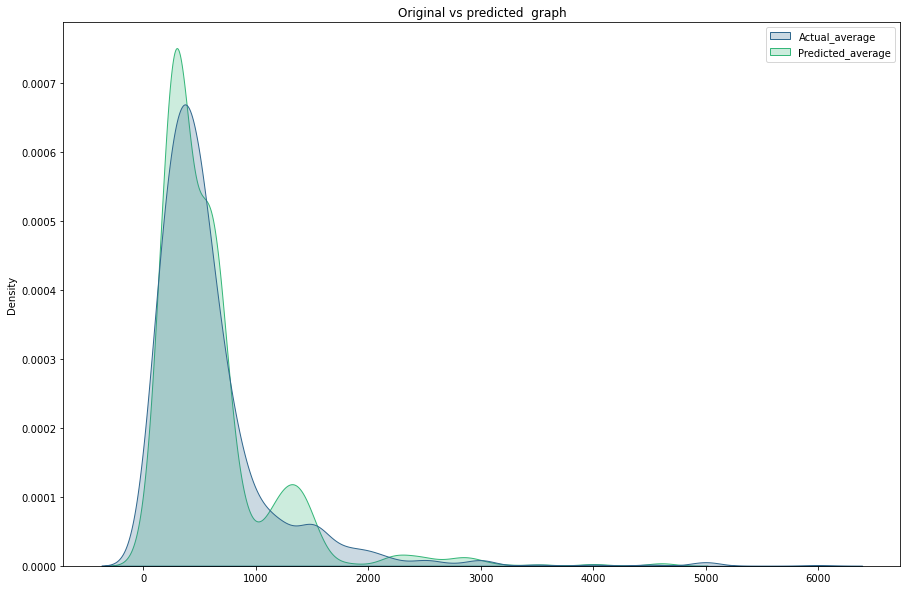

In [140]:
#Visulizing actual vs Predicted
plt.figure(figsize = (15,10))
sns.kdeplot(data = conclusion, palette = 'viridis', gridsize = 900, shade = True)
plt.title('Original vs predicted  graph')
plt.show()

# 2. CLASSIFICATION MODEL

In [166]:
#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing Evaluation metrics for Classification models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report


In [141]:
data.head()

,Restaurant_Name,Country_Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,3749,162,73,8685,171,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,3173,162,73,6055,593,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,2897,162,75,4684,308,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,4707,162,75,8690,862,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6
4,5523,162,75,8689,862,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229,6


# Spliting Dataset into X and Y

In [143]:
x = data.drop('Price_range', axis = 1)
y = data['Price_range']

In [144]:
print(x.shape)
print(y.shape)

(8704, 18)
(8704,)


# Standardization

In [145]:
#Scaling x data using Standard scaler
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [146]:
x.head(2)

,Restaurant_Name,Country_Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,0.050684,5.973425,-0.384242,1.571811,-1.634364,2.147662,-0.999568,-0.166203,0.836108,-5.642124,2.673913,-0.609213,-0.062622,1.497709,-2.148648,-0.409856,1.174663,3.63302
1,-0.218346,5.973425,-0.384242,0.533448,-0.258413,2.147069,-1.000668,0.211672,1.004533,-5.642124,2.673913,-0.609213,-0.062622,1.299625,-2.148648,-0.409856,2.667893,3.63302


# Checking multicollinearity

In [147]:
# Checking multicollinearity problem using VIF
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]

vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.008113,Restaurant_Name
1,14.318807,Country_Code
2,1.041116,City
3,1.059646,Address
4,1.057096,Locality
5,1.853115,Longitude
6,3.545121,Latitude
7,1.029423,Cuisines
8,1.825772,Average_Cost_for_two
9,3.551554,Currency


In [148]:
#Droping Country 
x = x.drop(columns = ['Country'], axis = 1)

#Scaling x data after removing column ER
scaled = scaler.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.008066,Restaurant_Name
1,2.466502,Country_Code
2,1.038348,City
3,1.057930,Address
4,1.056761,Locality
5,1.570487,Longitude
6,2.278255,Latitude
7,1.029421,Cuisines
8,1.797485,Average_Cost_for_two
9,1.671406,Currency


multicollinearity has been eliminated successfully

# Using power transformer to remove skewness

In [149]:
x.skew()

Restaurant_Name          0.046486
Country_Code             6.459914
City                    -1.195210
Address                 -0.121397
Locality                -0.304982
Longitude               -2.498700
Latitude                -3.675618
Cuisines                -0.326084
Average_Cost_for_two     3.688100
Currency                 4.498329
Has_Table_booking        2.300326
Has_Online_delivery      1.032427
Is_delivering_now       15.908839
Aggregate_rating        -0.877791
Rating_color             0.075107
Rating_text              0.434807
Votes                    3.584346
dtype: float64

In [150]:
#Will remove remaining skewness by using Power Tranform
x = PT.fit_transform(x)
x = pd.DataFrame(x)
x.columns = x.columns

In [151]:
x.skew()

0      0.010613
1      5.272511
2      0.769819
3     -0.021635
4     -0.041758
5      2.024078
6      4.949713
7     -0.065717
8      0.115625
9     -1.147461
10     2.300326
11     1.032427
12    15.908839
13    -0.098013
14    -0.010827
15     0.159226
16     0.646788
dtype: float64

# Oversampling the target

In [152]:
from imblearn.over_sampling import SMOTE

In [153]:
#Will balance out the data using SMOTE
smt = SMOTE()

In [155]:
x, y = smt.fit_resample(x, y)
y.value_counts()

3    4285
4    4285
2    4285
1    4285
Name: Price_range, dtype: int64

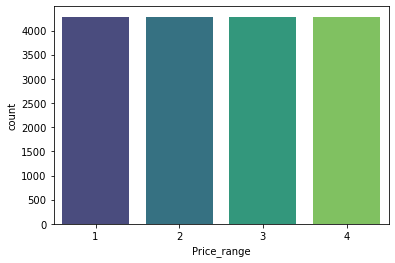

In [156]:
#Visualizing balanced dataset
sns.countplot(y, palette = 'viridis')
plt.show()

# Applying PCA to check  dimentionality features

In [158]:
from sklearn.decomposition import PCA
pca = PCA()
principle_comp = pca.fit_transform(x)

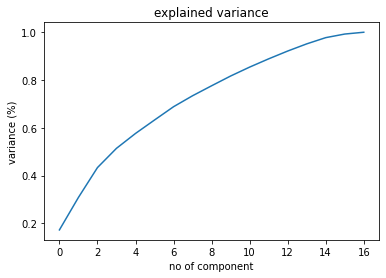

In [159]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

14 components is enough to describe the features

In [160]:
pca = PCA(n_components = 14)

In [163]:
x = pca.fit_transform(x)
x

array([[ 5.32895617e+00,  1.09571226e-01,  9.15383050e+00, ...,
         1.08052707e+00,  6.90506126e-01, -1.73530075e+00],
       [ 5.22798497e+00, -1.32495758e-02,  8.96570605e+00, ...,
         1.04085105e+00, -1.37256102e-01, -5.43023734e-01],
       [ 4.87763975e+00,  4.01620495e-01,  9.17941289e+00, ...,
         2.85081183e+00, -6.48534818e-01, -3.50888802e-01],
       ...,
       [ 5.37259755e+00,  5.07766026e+00, -2.60487640e+00, ...,
         6.59594542e-01, -1.84414838e-01,  1.00942134e-01],
       [-1.79589937e+00,  1.69004224e+00,  1.53131014e+00, ...,
         5.13941856e-01, -5.29093047e-01,  3.80811502e-04],
       [ 5.13096338e+00,  4.94615892e+00, -3.62304302e+00, ...,
        -4.58434009e-01, -5.80086177e-01, -2.84701449e-01]])

In [167]:
#Find best Random_state
maxaccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x, y, random_state = i,test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7520420070011669 on Random State = 98


In [168]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 98)

In [169]:
LR_model = LogisticRegression()
RD_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
SV_model = SVC()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
SGH_model = SGDClassifier()
Bag_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()

model = [LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model]

In [170]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred = m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred) * 100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('#' * 70)

Accuracy_Score of  LogisticRegression() is 75.20420070011669
Confusion Matrix of  LogisticRegression()  is 
 [[821  70   1   0]
 [ 67 660  84  34]
 [  0 146 499 207]
 [  0  32 209 598]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       892
           2       0.73      0.78      0.75       845
           3       0.63      0.59      0.61       852
           4       0.71      0.71      0.71       839

    accuracy                           0.75      3428
   macro avg       0.75      0.75      0.75      3428
weighted avg       0.75      0.75      0.75      3428

######################################################################
Accuracy_Score of  RidgeClassifier() is 63.33138856476079
Confusion Matrix of  RidgeClassifier()  is 
 [[753 135   2   2]
 [353 366  63  63]
 [ 63 119 427 243]
 [ 28   6 180 625]]
              precision    recall  f1-score   support

           1       0.63      0.84      0.72       892
           2       

In [171]:
#Checking Cross Validation
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i, x, y, cv = 5, scoring = 'accuracy').mean() * 100)
    print('#' * 70)

Accuracy_Score of  LogisticRegression() is 75.20420070011669
cross Validation accuracy score of  LogisticRegression()  is  72.65460910151693
######################################################################
Accuracy_Score of  RidgeClassifier() is 63.33138856476079
cross Validation accuracy score of  RidgeClassifier()  is  62.19369894982496
######################################################################
Accuracy_Score of  DecisionTreeClassifier() is 88.97316219369895
cross Validation accuracy score of  DecisionTreeClassifier()  is  87.3512252042007
######################################################################
Accuracy_Score of  SVC() is 92.18203033838974
cross Validation accuracy score of  SVC()  is  89.31155192532088
######################################################################
Accuracy_Score of  KNeighborsClassifier() is 86.8144690781797
cross Validation accuracy score of  KNeighborsClassifier()  is  82.83547257876313
#####################################

Best model is random forest as it provides 95% of accuracy

# Hyper Tuning Random Forest Classifier

In [172]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[8,12,15],
    'criterion':['gini','entropy'],
    'max_depth':[10,15,16],
    'min_samples_leaf':[3,5,8],
    'min_samples_split':[3,5,10],
}
grd = GridSearchCV(RFR_model, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 15}


In [173]:
best_RFR_model = grd.best_estimator_
best_RFR_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=15)

In [175]:
#Model Confidence/Accuracy
print('Accuracy_Score of best Random Forest Model is', accuracy_score(y_test,best_RFR_model.predict(x_test))*100)
print("Cross Validation accuracy score of best Random Forest model is ",cross_val_score(best_RFR_model, x, y, cv = 5, scoring = 'accuracy').mean() * 100)

Accuracy_Score of best Random Forest Model is 93.05717619603267
Cross Validation accuracy score of best Random Forest model is  90.1808634772462


# Saving the best model

In [176]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(RFR_model, open('zomato_model', 'wb'))

In [177]:
#Loading saved model
loaded_model = pickle.load(open('zomato_model','rb'))

In [178]:
final_model= loaded_model.predict(x_test)
final_model

array([1, 4, 2, ..., 4, 4, 1], dtype=int64)

In [179]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
conclusion = pd.DataFrame({'Actual Price range': y_test, 'Predicted Price range': final_model})
conclusion.head()

,Actual Price range,Predicted Price range
2645,1,1
14569,4,4
9026,2,2
10787,3,3
14923,4,4


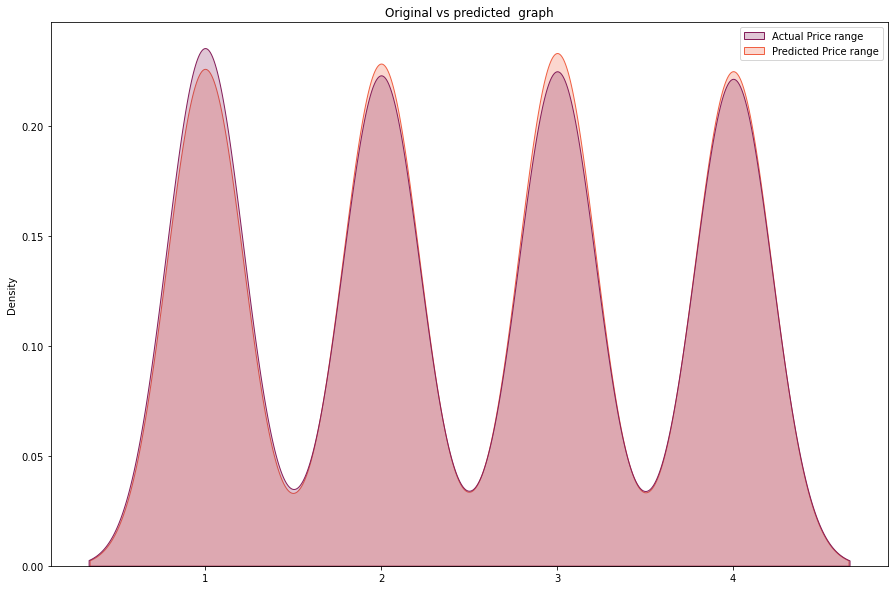

In [180]:
#Visulizing actual vs Predicted
plt.figure(figsize = (15,10))
sns.kdeplot(data = conclusion, palette = 'rocket', gridsize = 900, shade = True)
plt.title('Original vs predicted  graph')
plt.show()

# =================THANKYOU===============================